# Import

<mark>import auc เพิ่มตรง sklearn.metrics</mark>

In [5]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import numpy as np
import pandas as pd

import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

# import seaborn as sns
import seaborn as sns

# importing the statistics module
import statistics

import joblib

from sklearn.svm import SVC

In [6]:
# read fold for check
f1 = pd.read_csv("../Anny_oversampling/fold1.csv")
f2 = pd.read_csv("../Anny_oversampling/fold2.csv")
f3 = pd.read_csv("../Anny_oversampling/fold3.csv")
f4 = pd.read_csv("../Anny_oversampling/fold4.csv")
f5 = pd.read_csv("../Anny_oversampling/fold5.csv")

# read raw data
raw_data = pd.read_csv("../raw_data/data.csv")

# Review

In [4]:
# run it once
raw_data = raw_data.drop(labels='Unnamed: 32', axis=1)
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
print("########## the fold ############")
print("fold1: "+ str(len(f1)))
print("fold2: "+ str(len(f2)))
print("fold3: "+ str(len(f3)))
print("fold4: "+ str(len(f4)))
print("fold5: "+ str(len(f5)))
print("\ntotal: " + str(len(f1) + len(f2) + len(f3) + len(f4) + len(f5)))
print("################################")

########## the fold ############
fold1: 91
fold2: 91
fold3: 91
fold4: 91
fold5: 91

total: 455
################################


In [6]:
y_f1 = f1[f1.columns[1]]
le = LabelEncoder()
y_f1 = np.array(le.fit_transform(y_f1))
print(le.classes_)
y_f2 = f2[f2.columns[1]]
le = LabelEncoder()
y_f2 = np.array(le.fit_transform(y_f2))
print(le.classes_)
y_f3 = f3[f3.columns[1]]
le = LabelEncoder()
y_f3 = np.array(le.fit_transform(y_f3))
print(le.classes_)
y_f4 = f4[f4.columns[1]]
le = LabelEncoder()
y_f4 = np.array(le.fit_transform(y_f4))
print(le.classes_)
y_f5 = f5[f5.columns[1]]
le = LabelEncoder()
y_f5 = np.array(le.fit_transform(y_f5))
print(le.classes_)

['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']
['B' 'M']


In [7]:
# check balance in each fold
print("------ fold ------")
print("f1 positive: " + str(sum(y_f1)))
print("f1 negative: " + str(len(f1) - sum(y_f1)))
print("------------------")
print("f2 positive: " + str(sum(y_f2)))
print("f2 negative: " + str(len(f2) - sum(y_f2)))
print("------------------")
print("f3 positive: " + str(sum(y_f3)))
print("f3 negative: " + str(len(f3) - sum(y_f3)))
print("------------------")
print("f4 positive: " + str(sum(y_f4)))
print("f4 negative: " + str(len(f4) - sum(y_f4)))
print("------------------")
print("f5 positive: " + str(sum(y_f5)))
print("f5 negative: " + str(len(f5) - sum(y_f5)))
print("------------------")

------ fold ------
f1 positive: 39
f1 negative: 52
------------------
f2 positive: 38
f2 negative: 53
------------------
f3 positive: 25
f3 negative: 66
------------------
f4 positive: 19
f4 negative: 72
------------------
f5 positive: 23
f5 negative: 68
------------------


# Define function

In [26]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [27]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [28]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [29]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [30]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [31]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

# Setting

In [171]:
# setting split and path
split = 'split5'
path = "../Anny_oversampling/DATA/"
train_path = "{}/{}/train/oversampled_train_{}.csv".format(path,split,split)
test_path =  "{}/test.csv".format(path)
valid_path = "{}/{}/val/val_{}.csv".format(path,split,split)

In [172]:
# check if path is correct
print(train_path)
print(test_path)
print(valid_path)

../Anny_oversampling/DATA//split5/train/oversampled_train_split5.csv
../Anny_oversampling/DATA//test.csv
../Anny_oversampling/DATA//split5/val/val_split5.csv


In [173]:
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(486, 32)
(486, 30)
['B' 'M']


In [174]:
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [175]:
# Load the validation set
val_data = pd.read_csv(valid_path)
print(val_data.shape)
x_val = val_data[val_data.columns[2:]]
print(x_val.shape)
y_val = val_data[val_data.columns[1]]
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

(91, 32)
(91, 30)
['B' 'M']


In [206]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

<mark>แก้ grid_search.fit เป็นของ train</mark>

In [207]:
# # Define parameter grid
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# # Define SGD model
# model = SVC()

# # Define grid search object
# grid_search = GridSearchCV(model, param_grid)

# # Fit grid search object to the data
# grid_search.fit(x_train, y_train)

# # loss = grid_search.best_params_['loss']
# # penalty = grid_search.best_params_['penalty']
# # learning_rate = grid_search.best_params_['learning_rate']
# # eta0 = grid_search.best_params_['eta0']
# # max_iter = grid_search.best_params_['max_iter']
# # alpha = grid_search.best_params_['alpha']

# Compare parameter

## Parameter set 1

In [208]:
# Print best parameter and score
# print('Best loss parameter:', loss)
# print('Best penalty parameter:', penalty)
# print('Best learning_rate parameter:', learning_rate)
# print('Best eta0 parameter:', eta0)
# print('Best max_iter parameter:', max_iter)
# print('Best alpha parameter:', alpha)
print('Best param:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

NameError: name 'grid_search' is not defined

In [210]:
# create the individual models
# grid search use val
# sgd_model = SGDClassifier(loss='hinge', penalty='l2', learning_rate='optimal', eta0=0.1, max_iter=2000, alpha=1e-07)
# sgd_model.fit(x_train, y_train)
# 'model__C': 0.026000000000000002,
#  'model__class_weight': None,
#  'model__degree': 3,
#  'model__gamma': 'scale',
#  'model__kernel': 'linear',
#  'model__max_iter': 216000,
#  'model__probability': True}
model = SVC(C=0.026000000000000002, gamma='scale', kernel='linear', class_weight=None)
model.fit(x_train, y_train)

SVC(C=0.026000000000000002, kernel='linear')

<mark>แก้ path ไว้เก็บ model อันใหม่ อันเก่า เก็บไว้ก่อนน</mark>

In [177]:
model_path = "../SGD/svm/param1/svm_model_{}.pkl".format(split)

In [112]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/param1/svm_model_split5.pkl']

In [178]:
# Load the saved model from disk
model = joblib.load(model_path)

In [142]:
fpr_vals = []
tpr_vals = []
thresholds_vals = []

<mark>เก็บค่า score ต่างๆ ของ val ทุก split</mark>

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


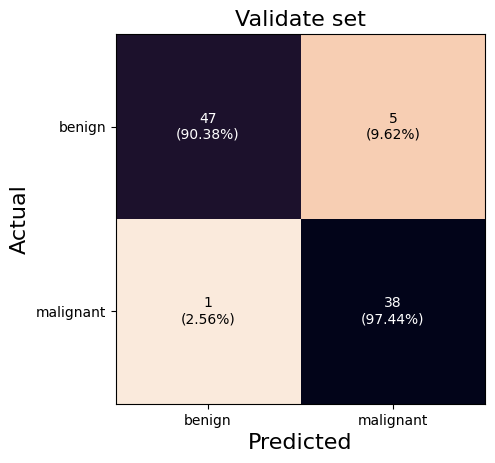

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 97.83%
Accuracy: 94.74%
Precision: 98.44%
Sensitivity: 92.65%
Precision: 98.44%
F1: 95.45%


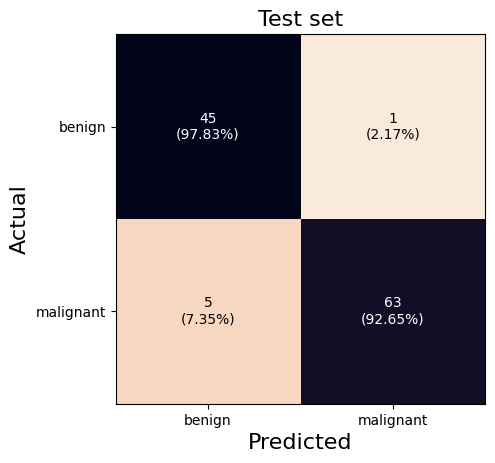

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9524


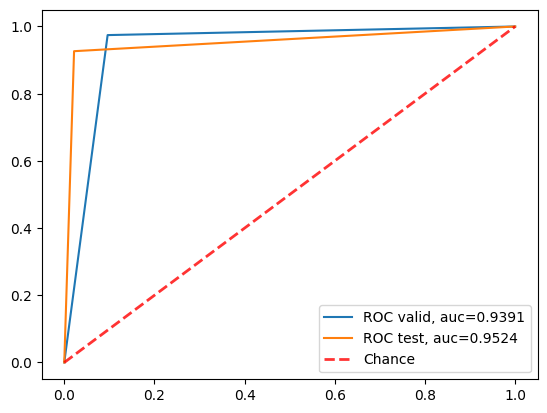

In [143]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split1 = sensitivity(cm_val)
spec_val_split1 = specificity(cm_val)
acc_val_split1 = accuracy(cm_val)
pre_val_split1 = precision(cm_val)
f1_score_val_split1 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split1 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)


# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////
print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[52  1]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 98.11%
Accuracy: 96.70%
Precision: 97.30%
Sensitivity: 94.74%
Precision: 97.30%
F1: 96.00%


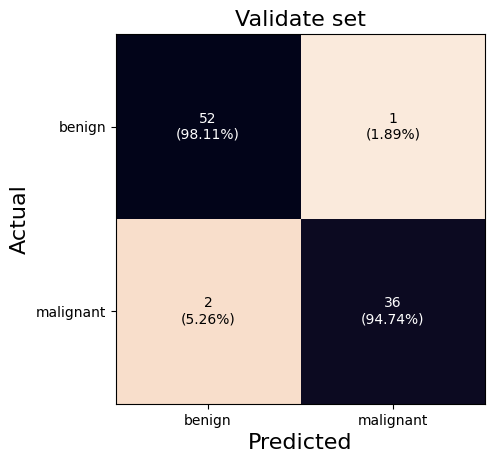

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 97.83%
Accuracy: 95.61%
Precision: 98.46%
Sensitivity: 94.12%
Precision: 98.46%
F1: 96.24%


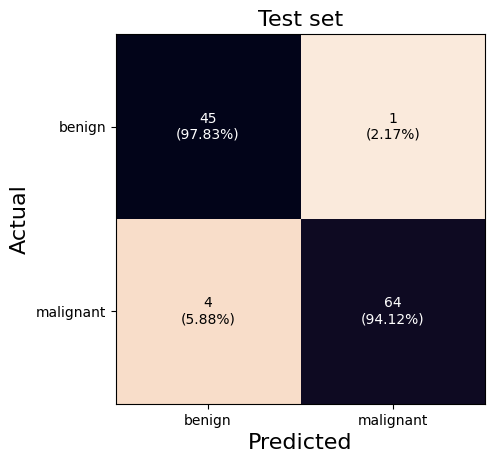

---------------------------------------
AUC validate: 0.9643
AUC test: 0.9597


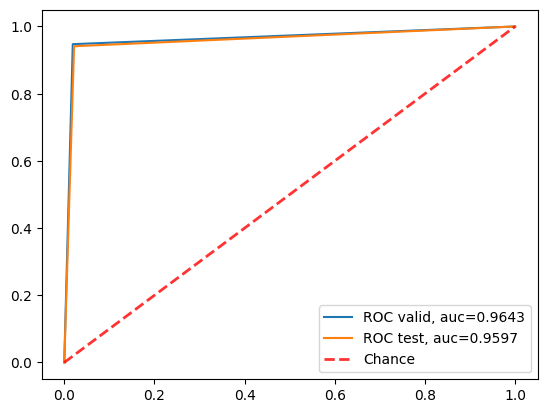

In [152]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split2 = sensitivity(cm_val)
spec_val_split2 = specificity(cm_val)
acc_val_split2 = accuracy(cm_val)
pre_val_split2 = precision(cm_val)
f1_score_val_split2 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split2 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split2)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split2))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[57  9]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 86.36%
Accuracy: 89.01%
Precision: 72.73%
Sensitivity: 96.00%
Precision: 72.73%
F1: 82.76%


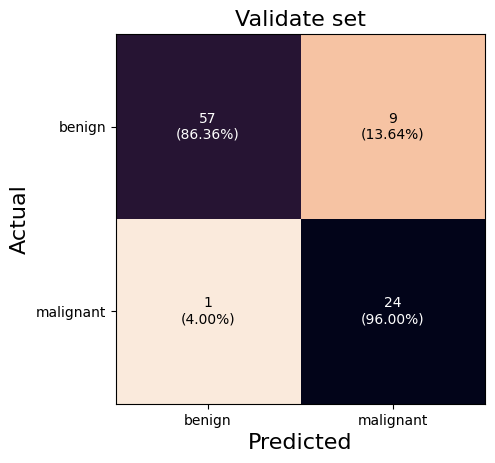

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


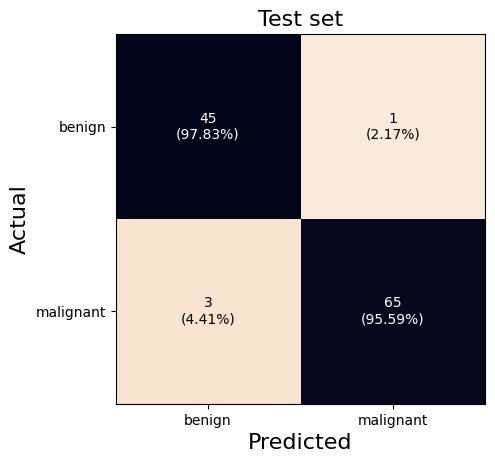

---------------------------------------
AUC validate: 0.9118
AUC test: 0.9671


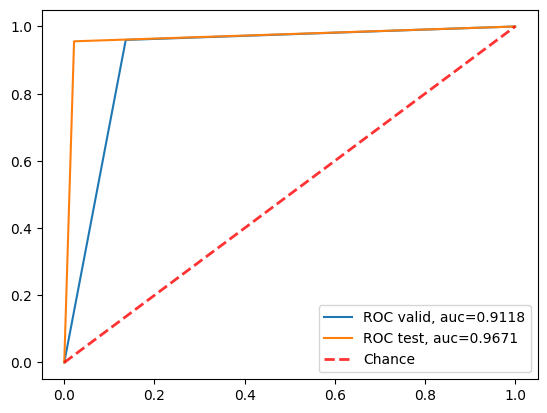

In [161]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split3 = sensitivity(cm_val)
spec_val_split3 = specificity(cm_val)
acc_val_split3 = accuracy(cm_val)
pre_val_split3 = precision(cm_val)
f1_score_val_split3 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split3 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split3)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split3))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[57 15]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 79.17%
Accuracy: 83.52%
Precision: 55.88%
Sensitivity: 100.00%
Precision: 55.88%
F1: 71.70%


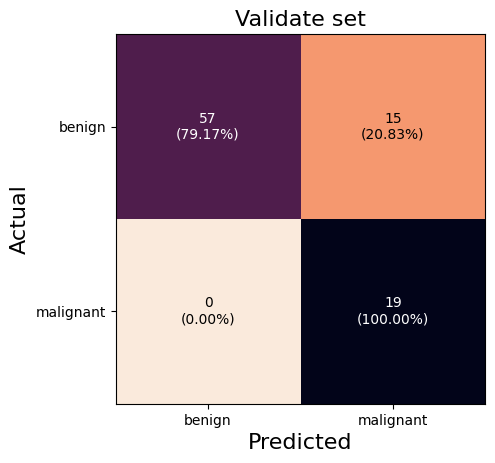

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 2 66]] 

----------------
Sensitivity: 97.06%
Specificity: 97.83%
Accuracy: 97.37%
Precision: 98.51%
Sensitivity: 97.06%
Precision: 98.51%
F1: 97.78%


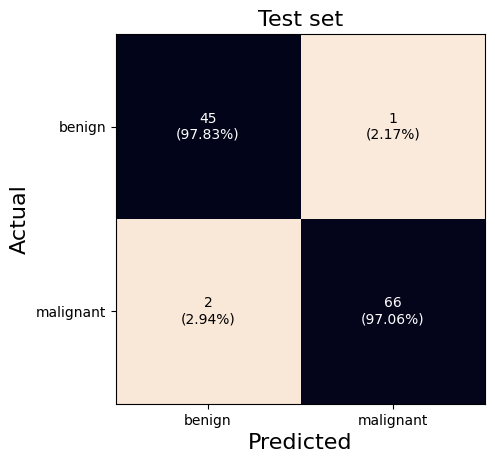

---------------------------------------
AUC validate: 0.8958
AUC test: 0.9744


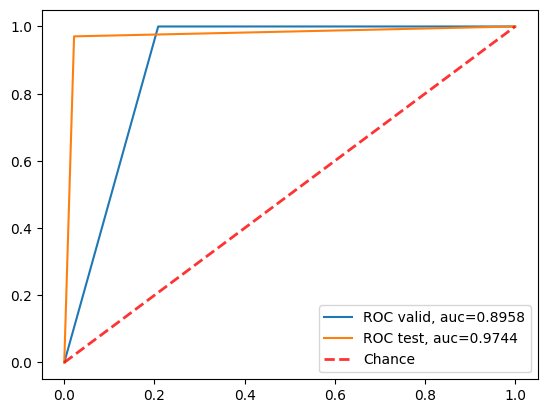

In [170]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split4 = sensitivity(cm_val)
spec_val_split4 = specificity(cm_val)
acc_val_split4 = accuracy(cm_val)
pre_val_split4 = precision(cm_val)
f1_score_val_split4 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split4 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split4)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split4))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[67  1]
 [ 1 22]] 

----------------
Sensitivity: 95.65%
Specificity: 98.53%
Accuracy: 97.80%
Precision: 95.65%
Sensitivity: 95.65%
Precision: 95.65%
F1: 95.65%


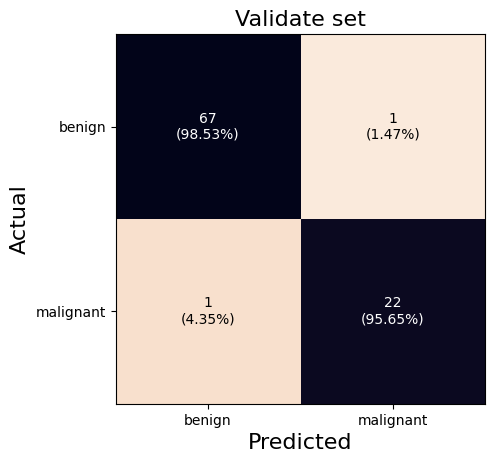

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


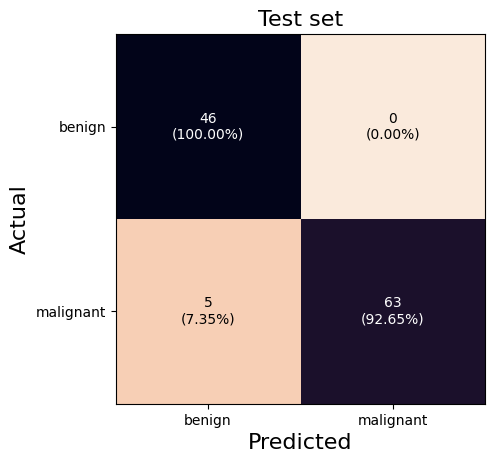

---------------------------------------
AUC validate: 0.9709
AUC test: 0.9632


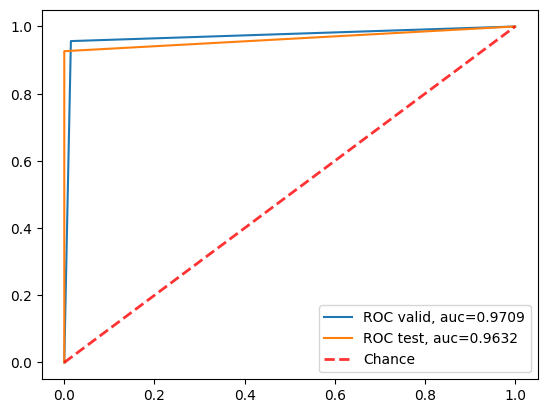

In [211]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split5 = sensitivity(cm_val)
spec_val_split5 = specificity(cm_val)
acc_val_split5 = accuracy(cm_val)
pre_val_split5 = precision(cm_val)
f1_score_val_split5 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split5 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split5)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split5))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

<mark>แก้เป็นของ val ให้หมดเลย</mark>

In [115]:
val_split1 = np.array([[47, 5], [1, 38]])
val_split2 = np.array([[51, 2], [2, 36]])
val_split3 = np.array([[57, 9], [1, 24]])
val_split4 = np.array([[57, 15], [0, 19]])
val_split5 = np.array([[51, 17], [0, 23]])

In [116]:
overall_val = val_split1 + val_split2 + val_split3 + val_split4 + val_split5
print(overall_val)

[[263  48]
 [  4 140]]


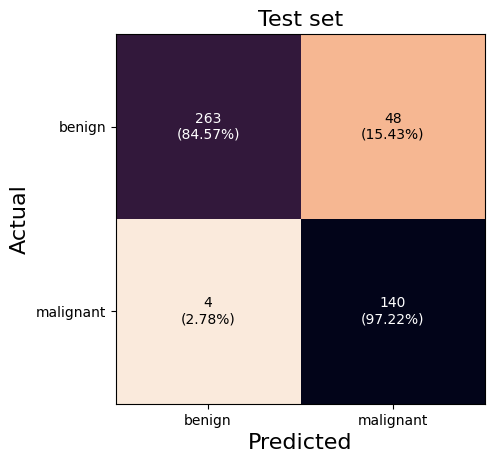

In [117]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = overall_val.astype('float') / overall_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

In [118]:
sensitivity_values = []

sensitivity_values.append(sen_val_split1)
sensitivity_values.append(sen_val_split2)
sensitivity_values.append(sen_val_split3)
sensitivity_values.append(sen_val_split4)
sensitivity_values.append(sen_val_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[97.43589743589743, 94.73684210526315, 96.0, 100.0, 100.0]
Mean Sensitivity: 97.63454790823212
Sensitivity Standard Deviation: 2.3610715253843386
Overall Sensitivity: 97.63 ± 2.36%


In [119]:
specificity_values = []

specificity_values.append(spec_val_split1)
specificity_values.append(spec_val_split2)
specificity_values.append(spec_val_split3)
specificity_values.append(spec_val_split4)
specificity_values.append(spec_val_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[90.38461538461539, 98.11320754716981, 86.36363636363636, 79.16666666666666, 75.0]
Mean Specificity: 85.80562519241764
Specificity Standard Deviation: 9.132256254235688
Overall Specificity: 85.81 ± 9.13%


In [120]:
accuracy_values = []

accuracy_values.append(acc_val_split1)
accuracy_values.append(acc_val_split2)
accuracy_values.append(acc_val_split3)
accuracy_values.append(acc_val_split4)
accuracy_values.append(acc_val_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[93.4065934065934, 96.7032967032967, 89.01098901098901, 83.51648351648352, 81.31868131868131]
Mean accuracy: 88.79120879120879
accuracy Standard Deviation: 6.473264384625556
Overall accuracy: 88.79 ± 6.47%


In [121]:
precision_values = []

precision_values.append(pre_val_split1)
precision_values.append(pre_val_split2)
precision_values.append(pre_val_split3)
precision_values.append(pre_val_split4)
precision_values.append(pre_val_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[88.37209302325581, 97.2972972972973, 72.72727272727273, 55.88235294117647, 57.49999999999999]
Mean precision: 74.35580319780047
precision Standard Deviation: 18.376663933565244
Overall precision: 74.36 ± 18.38%


In [122]:
f1_values = []

f1_values.append(f1_score_val_split1)
f1_values.append(f1_score_val_split2)
f1_values.append(f1_score_val_split3)
f1_values.append(f1_score_val_split4)
f1_values.append(f1_score_val_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[92.68292682926828, 95.99999999999999, 82.75862068965516, 71.69811320754717, 73.015873015873]
Mean f1: 83.23110674846872
f1 Standard Deviation: 11.067584662100845
Overall f1: 83.23 ± 11.07%


In [123]:
auc_values = []

auc_values.append(auc_val_split1)
auc_values.append(auc_val_split2)
auc_values.append(auc_val_split3)
auc_values.append(auc_val_split4)
auc_values.append(auc_val_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9391025641025641, 0.9642502482621648, 0.9118181818181817, 0.8958333333333333, 0.875]
Mean auc: 0.9172008655032488
auc Standard Deviation: 0.03521287613728601
Overall auc: 0.92 ± 0.04%


## Parameter set 2

In [132]:
# Print best parameter and score
# print('Best loss parameter:', loss)
# print('Best penalty parameter:', penalty)
# print('Best learning_rate parameter:', learning_rate)
# print('Best eta0 parameter:', eta0)
# print('Best max_iter parameter:', max_iter)
# print('Best alpha parameter:', alpha)
print('Best param:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best param: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.9883681852128454


In [144]:
# create the individual models
# val
# sgd_model = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='invscaling', eta0=0.1, max_iter=2000, alpha=0.01)
# sgd_model.fit(x_train, y_train)

model = SVC(C=1000, gamma=0.01, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1000, gamma=0.01)

<mark>แก้ path ไว้เก็บ model อันใหม่ อันเก่า เก็บไว้ก่อนน</mark>

In [145]:
model_path = "../SGD/svm/param2/svm_model_{}.pkl".format(split)

In [146]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/param2/svm_model_split1.pkl']

In [147]:
# Load the saved model from disk
model = joblib.load(model_path)

<mark>เก็บค่า score ต่างๆ ของ val ทุก split</mark>

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[46  6]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 88.46%
Accuracy: 92.31%
Precision: 86.36%
Sensitivity: 97.44%
Precision: 86.36%
F1: 91.57%


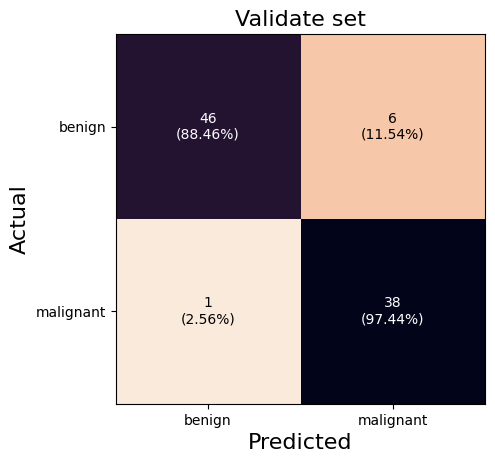

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


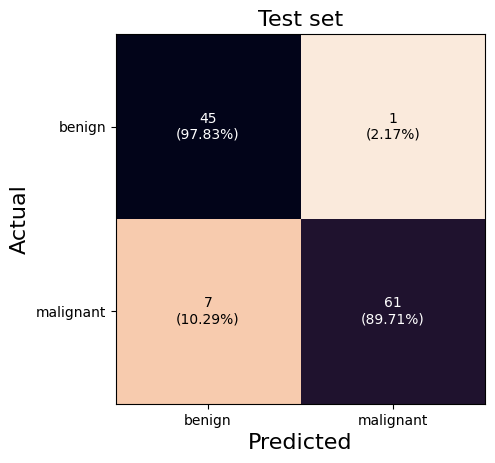

---------------------------------------
AUC validate: 0.9295
AUC test: 0.9377


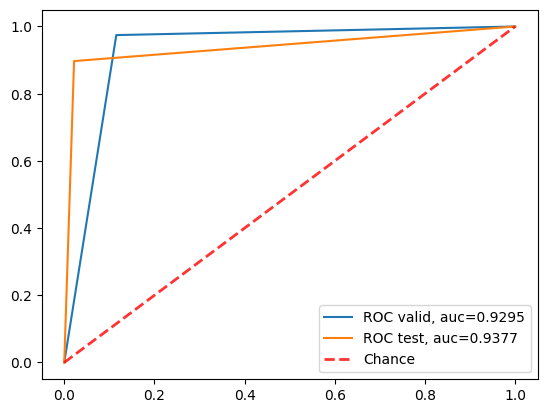

In [148]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split1 = sensitivity(cm_val)
spec_val_split1 = specificity(cm_val)
acc_val_split1 = accuracy(cm_val)
pre_val_split1 = precision(cm_val)
f1_score_val_split1 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split1 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[52  1]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 98.11%
Accuracy: 96.70%
Precision: 97.30%
Sensitivity: 94.74%
Precision: 97.30%
F1: 96.00%


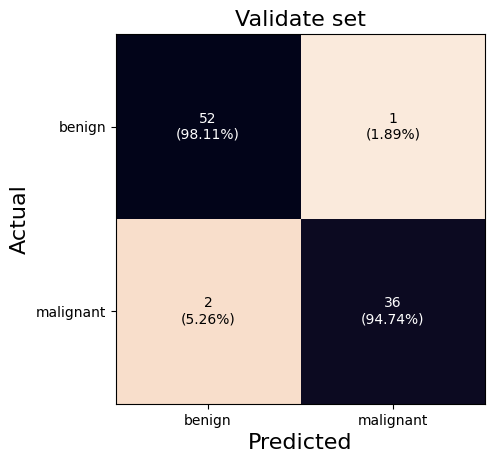

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 95.65%
Accuracy: 93.86%
Precision: 96.92%
Sensitivity: 92.65%
Precision: 96.92%
F1: 94.74%


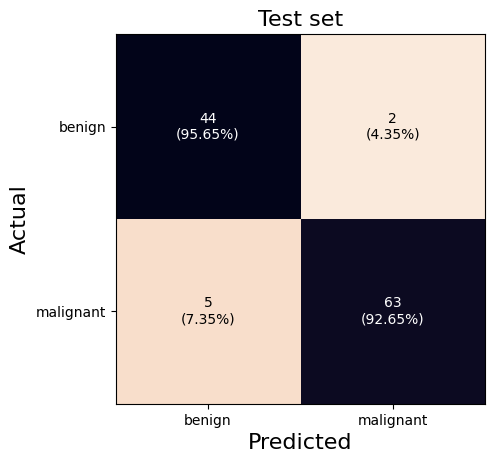

---------------------------------------
AUC validate: 0.9643
AUC test: 0.9415


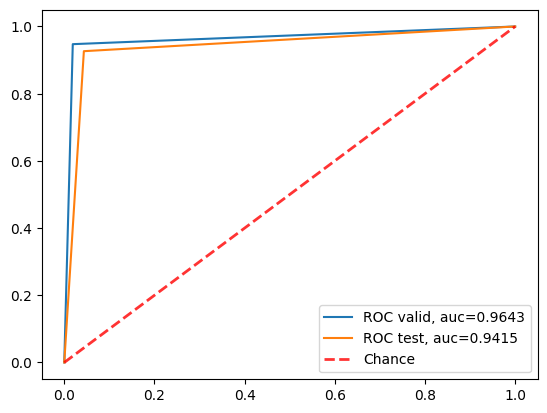

In [137]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split2 = sensitivity(cm_val)
spec_val_split2 = specificity(cm_val)
acc_val_split2 = accuracy(cm_val)
pre_val_split2 = precision(cm_val)
f1_score_val_split2 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split2 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split2)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split2))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[57  9]
 [ 0 25]] 

----------------
Sensitivity: 100.00%
Specificity: 86.36%
Accuracy: 90.11%
Precision: 73.53%
Sensitivity: 100.00%
Precision: 73.53%
F1: 84.75%


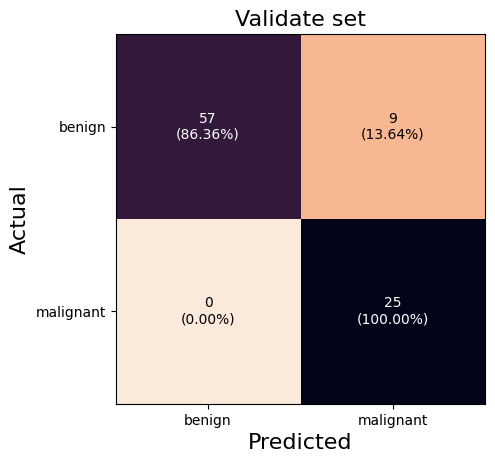

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


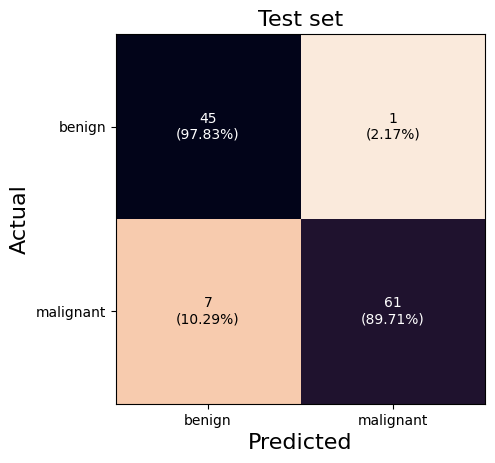

---------------------------------------
AUC validate: 0.9318
AUC test: 0.9377


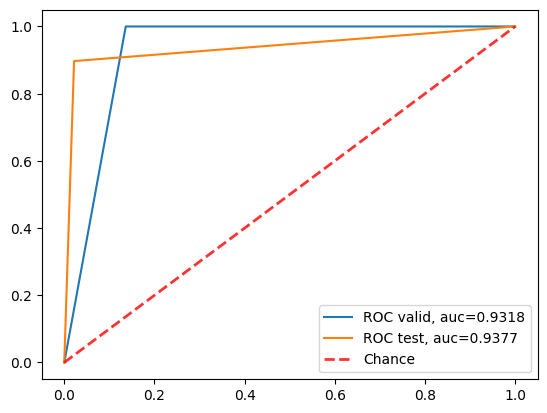

In [155]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split3 = sensitivity(cm_val)
spec_val_split3 = specificity(cm_val)
acc_val_split3 = accuracy(cm_val)
pre_val_split3 = precision(cm_val)
f1_score_val_split3 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split3 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split3)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split3))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[52 20]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 72.22%
Accuracy: 78.02%
Precision: 48.72%
Sensitivity: 100.00%
Precision: 48.72%
F1: 65.52%


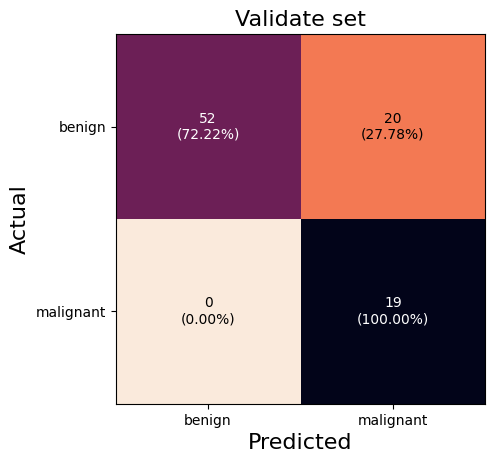

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


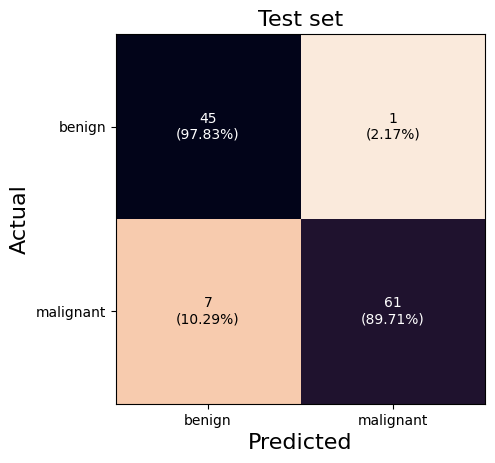

---------------------------------------
AUC validate: 0.8611
AUC test: 0.9377


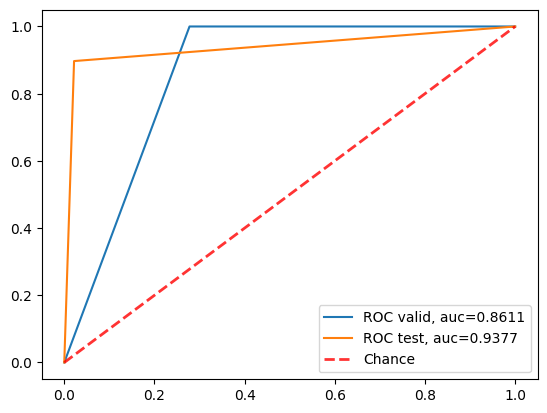

In [162]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split4 = sensitivity(cm_val)
spec_val_split4 = specificity(cm_val)
acc_val_split4 = accuracy(cm_val)
pre_val_split4 = precision(cm_val)
f1_score_val_split4 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split4 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split4)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split4))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[50 18]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 73.53%
Accuracy: 80.22%
Precision: 56.10%
Sensitivity: 100.00%
Precision: 56.10%
F1: 71.88%


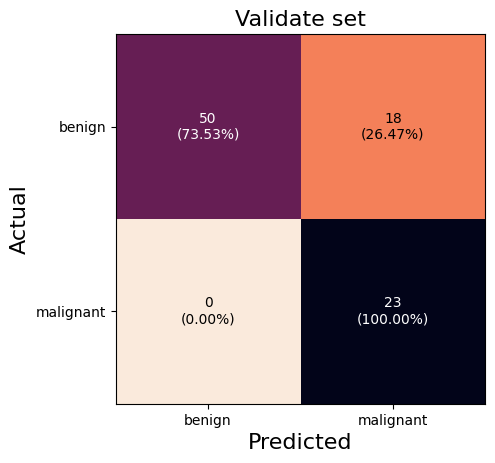

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


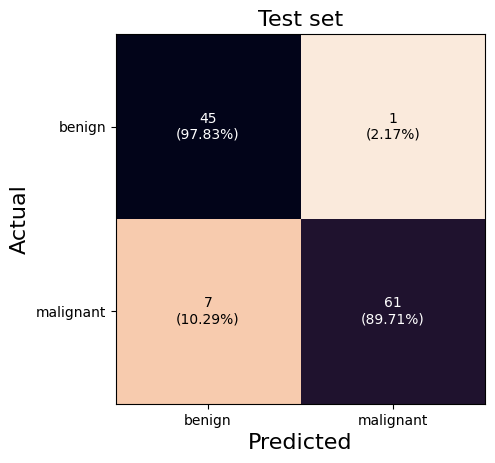

---------------------------------------
AUC validate: 0.8676
AUC test: 0.9377


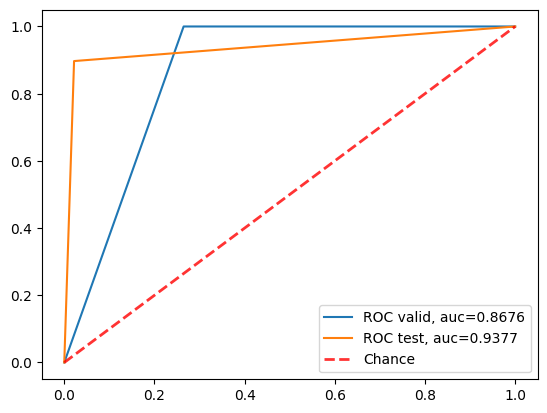

In [169]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split5 = sensitivity(cm_val)
spec_val_split5 = specificity(cm_val)
acc_val_split5 = accuracy(cm_val)
pre_val_split5 = precision(cm_val)
f1_score_val_split5 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split5 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split5)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split5))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

<mark>แก้เป็นของ val ให้หมดเลย</mark>

In [173]:
val_split1 = np.array([[46, 6], [1, 38]])
val_split2 = np.array([[52, 1], [2, 36]])
val_split3 = np.array([[57, 9], [0, 25]])
val_split4 = np.array([[52, 20], [0, 19]])
val_split5 = np.array([[50, 18], [0, 23]])

In [174]:
overall_val = val_split1 + val_split2 + val_split3 + val_split4 + val_split5
print(overall_val)

[[257  54]
 [  3 141]]


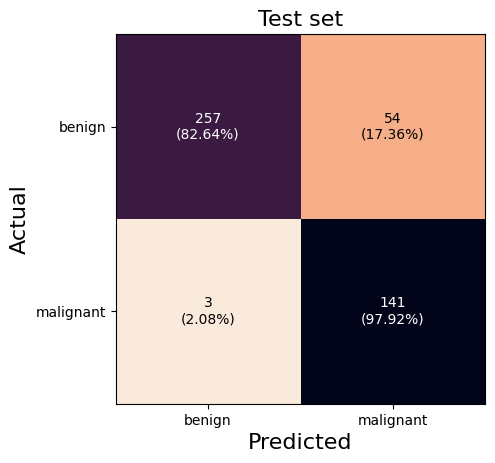

In [175]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = overall_val.astype('float') / overall_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

In [176]:
sensitivity_values = []

sensitivity_values.append(sen_val_split1)
sensitivity_values.append(sen_val_split2)
sensitivity_values.append(sen_val_split3)
sensitivity_values.append(sen_val_split4)
sensitivity_values.append(sen_val_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[97.43589743589743, 94.73684210526315, 100.0, 100.0, 100.0]
Mean Sensitivity: 98.43454790823212
Sensitivity Standard Deviation: 2.346393601149751
Overall Sensitivity: 98.43 ± 2.35%


In [177]:
specificity_values = []

specificity_values.append(spec_val_split1)
specificity_values.append(spec_val_split2)
specificity_values.append(spec_val_split3)
specificity_values.append(spec_val_split4)
specificity_values.append(spec_val_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[88.46153846153845, 98.11320754716981, 86.36363636363636, 72.22222222222221, 73.52941176470588]
Mean Specificity: 83.73800327185454
Specificity Standard Deviation: 10.870611591819282
Overall Specificity: 83.74 ± 10.87%


In [178]:
accuracy_values = []

accuracy_values.append(acc_val_split1)
accuracy_values.append(acc_val_split2)
accuracy_values.append(acc_val_split3)
accuracy_values.append(acc_val_split4)
accuracy_values.append(acc_val_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[92.3076923076923, 96.7032967032967, 90.10989010989012, 78.02197802197803, 80.21978021978022]
Mean accuracy: 87.47252747252747
accuracy Standard Deviation: 8.022730658656693
Overall accuracy: 87.47 ± 8.02%


In [179]:
precision_values = []

precision_values.append(pre_val_split1)
precision_values.append(pre_val_split2)
precision_values.append(pre_val_split3)
precision_values.append(pre_val_split4)
precision_values.append(pre_val_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[86.36363636363636, 97.2972972972973, 73.52941176470588, 48.717948717948715, 56.09756097560976]
Mean precision: 72.40117102383961
precision Standard Deviation: 20.26538420776495
Overall precision: 72.40 ± 20.27%


In [180]:
f1_values = []

f1_values.append(f1_score_val_split1)
f1_values.append(f1_score_val_split2)
f1_values.append(f1_score_val_split3)
f1_values.append(f1_score_val_split4)
f1_values.append(f1_score_val_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[91.56626506024098, 95.99999999999999, 84.7457627118644, 65.51724137931033, 71.875]
Mean f1: 81.94085383028315
f1 Standard Deviation: 12.934760390838425
Overall f1: 81.94 ± 12.93%


In [181]:
auc_values = []

auc_values.append(auc_val_split1)
auc_values.append(auc_val_split2)
auc_values.append(auc_val_split3)
auc_values.append(auc_val_split4)
auc_values.append(auc_val_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9294871794871794, 0.9642502482621648, 0.9318181818181819, 0.8611111111111112, 0.8676470588235294]
Mean auc: 0.9108627559004333
auc Standard Deviation: 0.0446627529466454
Overall auc: 0.91 ± 0.04%


## Parameter set 3

In [189]:
# Print best parameter and score
# print('Best loss parameter:', loss)
# print('Best penalty parameter:', penalty)
# print('Best learning_rate parameter:', learning_rate)
# print('Best eta0 parameter:', eta0)
# print('Best max_iter parameter:', max_iter)
# print('Best alpha parameter:', alpha)
print('Best param:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best param: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best score: 0.9816326530612246


In [223]:
# create the individual models
# val
# sgd_model = SGDClassifier(loss='hinge', penalty='elasticnet', learning_rate='optimal', eta0=0.01, max_iter=1000, alpha=0.01)
# sgd_model.fit(x_train, y_train)

model = SVC(C=10, gamma=1, kernel='linear')
model.fit(x_train, y_train)

SVC(C=10, gamma=1, kernel='linear')

<mark>แก้ path ไว้เก็บ model อันใหม่ อันเก่า เก็บไว้ก่อนน</mark>

In [224]:
model_path = "../SGD/svm/param3/svm_model_{}.pkl".format(split)

In [225]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/param3/svm_model_split4.pkl']

In [226]:
# Load the saved model from disk
model = joblib.load(model_path)

<mark>เก็บค่า score ต่างๆ ของ val ทุก split</mark>

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


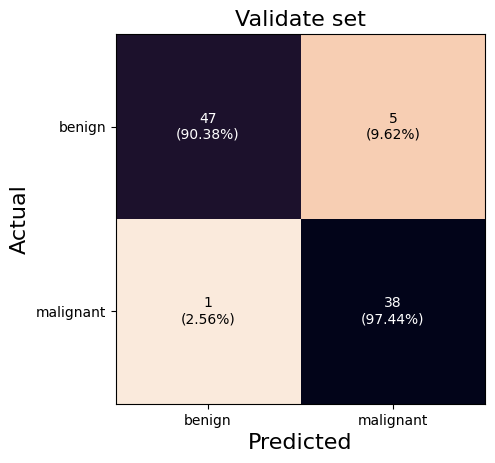

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 8 60]] 

----------------
Sensitivity: 88.24%
Specificity: 97.83%
Accuracy: 92.11%
Precision: 98.36%
Sensitivity: 88.24%
Precision: 98.36%
F1: 93.02%


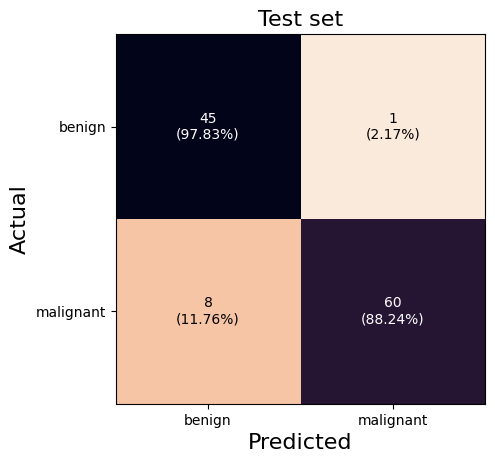

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9303


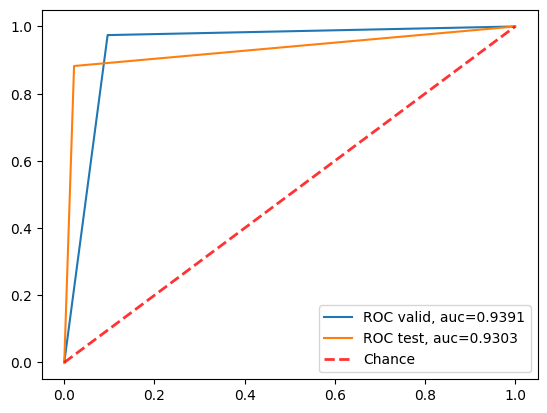

In [205]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split1 = sensitivity(cm_val)
spec_val_split1 = specificity(cm_val)
acc_val_split1 = accuracy(cm_val)
pre_val_split1 = precision(cm_val)
f1_score_val_split1 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split1 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[48  5]
 [ 1 37]] 

----------------
Sensitivity: 97.37%
Specificity: 90.57%
Accuracy: 93.41%
Precision: 88.10%
Sensitivity: 97.37%
Precision: 88.10%
F1: 92.50%


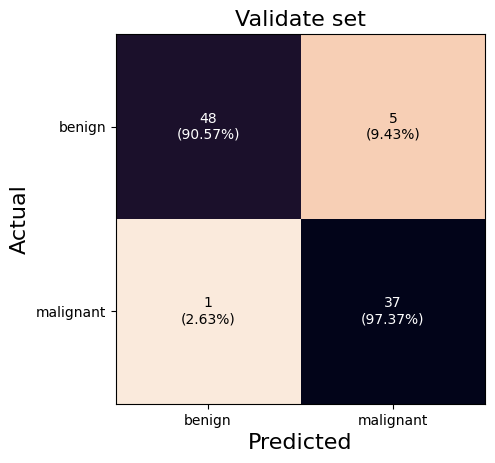

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


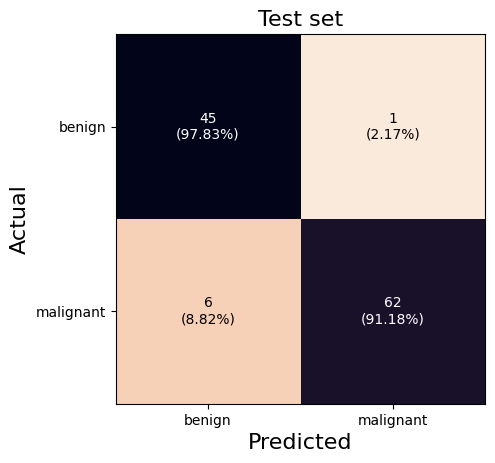

---------------------------------------
AUC validate: 0.9397
AUC test: 0.9450


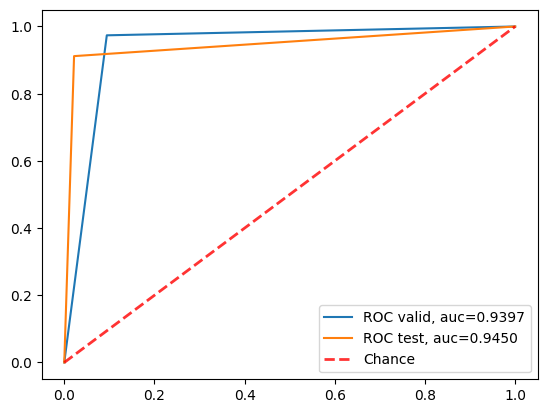

In [216]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split2 = sensitivity(cm_val)
spec_val_split2 = specificity(cm_val)
acc_val_split2 = accuracy(cm_val)
pre_val_split2 = precision(cm_val)
f1_score_val_split2 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split2 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split2)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split2))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[59  7]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 89.39%
Accuracy: 91.21%
Precision: 77.42%
Sensitivity: 96.00%
Precision: 77.42%
F1: 85.71%


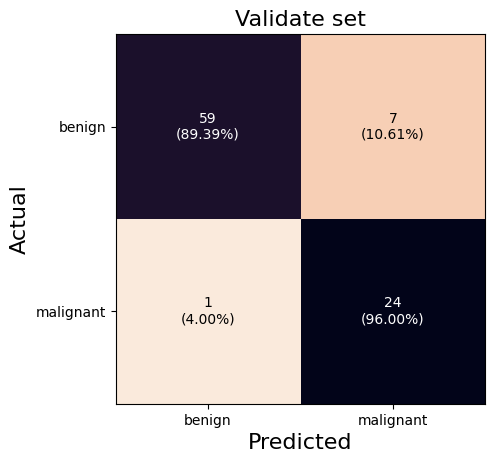

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


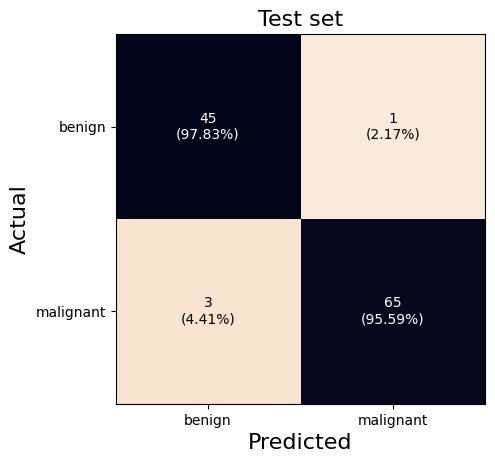

---------------------------------------
AUC validate: 0.9270
AUC test: 0.9671


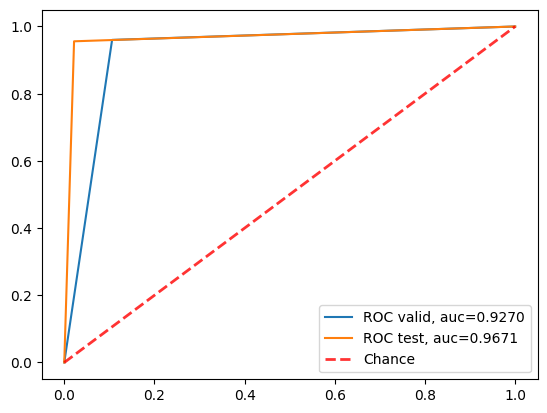

In [194]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split3 = sensitivity(cm_val)
spec_val_split3 = specificity(cm_val)
acc_val_split3 = accuracy(cm_val)
pre_val_split3 = precision(cm_val)
f1_score_val_split3 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split3 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split3)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split3))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[47 25]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 65.28%
Accuracy: 72.53%
Precision: 43.18%
Sensitivity: 100.00%
Precision: 43.18%
F1: 60.32%


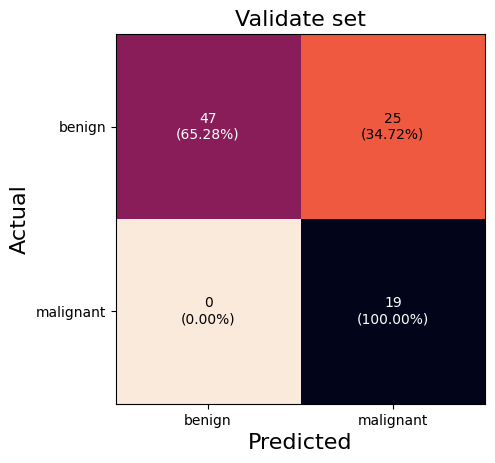

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 95.65%
Accuracy: 92.11%
Precision: 96.83%
Sensitivity: 89.71%
Precision: 96.83%
F1: 93.13%


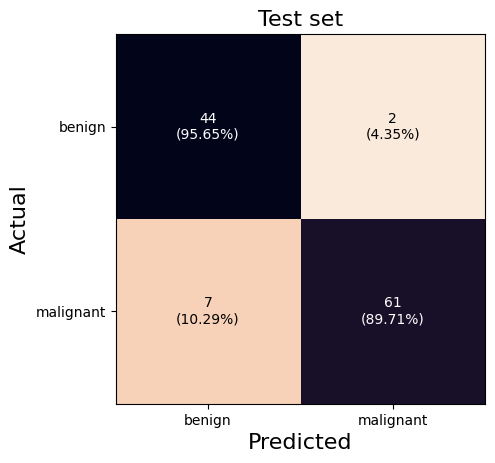

---------------------------------------
AUC validate: 0.8264
AUC test: 0.9268


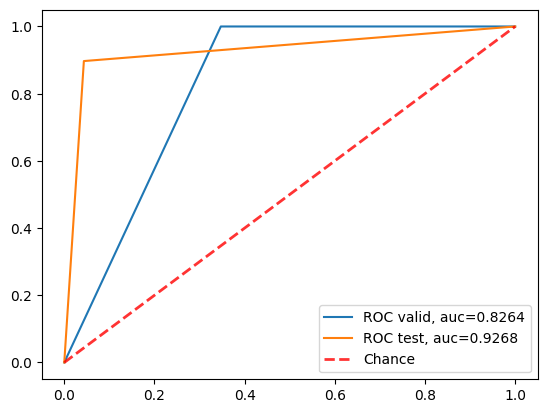

In [227]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split4 = sensitivity(cm_val)
spec_val_split4 = specificity(cm_val)
acc_val_split4 = accuracy(cm_val)
pre_val_split4 = precision(cm_val)
f1_score_val_split4 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split4 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split4)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split4))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[48 20]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 70.59%
Accuracy: 78.02%
Precision: 53.49%
Sensitivity: 100.00%
Precision: 53.49%
F1: 69.70%


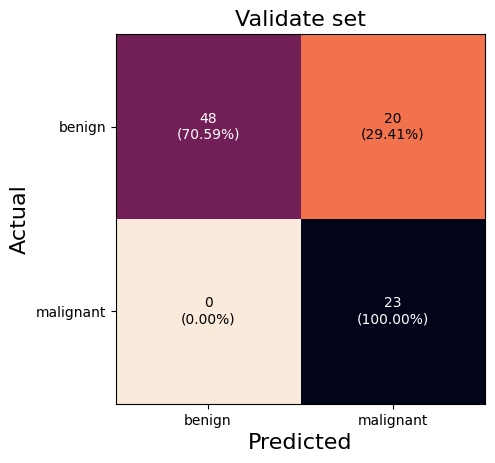

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 95.65%
Accuracy: 92.11%
Precision: 96.83%
Sensitivity: 89.71%
Precision: 96.83%
F1: 93.13%


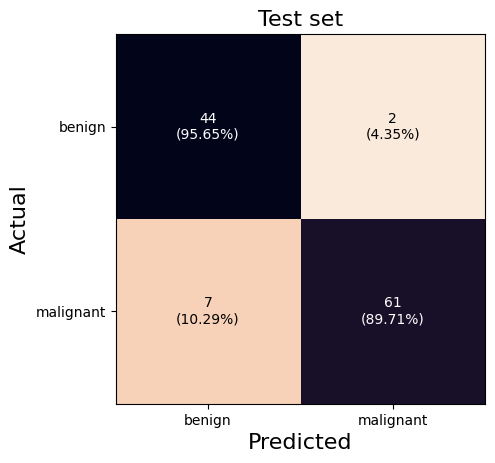

---------------------------------------
AUC validate: 0.8529
AUC test: 0.9268


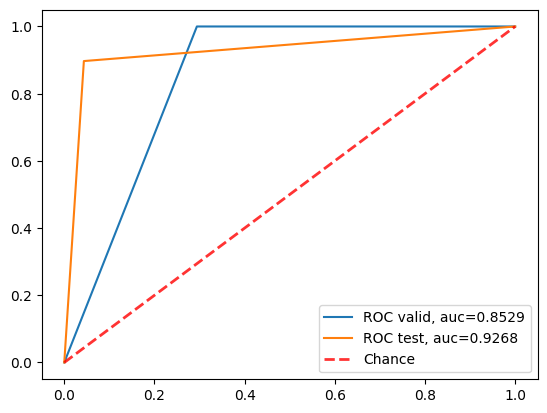

In [234]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split5 = sensitivity(cm_val)
spec_val_split5 = specificity(cm_val)
acc_val_split5 = accuracy(cm_val)
pre_val_split5 = precision(cm_val)
f1_score_val_split5 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split5 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split5)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split5))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

<mark>แก้เป็นของ val ให้หมดเลย</mark>

In [235]:
val_split1 = np.array([[47, 5], [1, 38]])
val_split2 = np.array([[48, 5], [1, 37]])
val_split3 = np.array([[59, 7], [1, 24]])
val_split4 = np.array([[47, 25], [0, 19]])
val_split5 = np.array([[48, 20], [0, 23]])

In [236]:
overall_val = val_split1 + val_split2 + val_split3 + val_split4 + val_split5
print(overall_val)

[[249  62]
 [  3 141]]


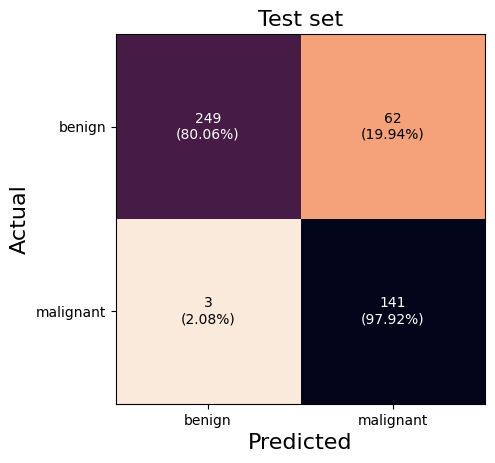

In [237]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = overall_val.astype('float') / overall_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

In [238]:
sensitivity_values = []

sensitivity_values.append(sen_val_split1)
sensitivity_values.append(sen_val_split2)
sensitivity_values.append(sen_val_split3)
sensitivity_values.append(sen_val_split4)
sensitivity_values.append(sen_val_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[97.43589743589743, 97.36842105263158, 96.0, 100.0, 100.0]
Mean Sensitivity: 98.1608636977058
Sensitivity Standard Deviation: 1.773958710299382
Overall Sensitivity: 98.16 ± 1.77%


In [239]:
specificity_values = []

specificity_values.append(spec_val_split1)
specificity_values.append(spec_val_split2)
specificity_values.append(spec_val_split3)
specificity_values.append(spec_val_split4)
specificity_values.append(spec_val_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[90.38461538461539, 90.56603773584906, 89.39393939393939, 65.27777777777779, 70.58823529411765]
Mean Specificity: 81.24212111725986
Specificity Standard Deviation: 12.3018119107355
Overall Specificity: 81.24 ± 12.30%


In [240]:
accuracy_values = []

accuracy_values.append(acc_val_split1)
accuracy_values.append(acc_val_split2)
accuracy_values.append(acc_val_split3)
accuracy_values.append(acc_val_split4)
accuracy_values.append(acc_val_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[93.4065934065934, 93.4065934065934, 91.20879120879121, 72.52747252747253, 78.02197802197803]
Mean accuracy: 85.71428571428571
accuracy Standard Deviation: 9.767246612434711
Overall accuracy: 85.71 ± 9.77%


In [241]:
precision_values = []

precision_values.append(pre_val_split1)
precision_values.append(pre_val_split2)
precision_values.append(pre_val_split3)
precision_values.append(pre_val_split4)
precision_values.append(pre_val_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[88.37209302325581, 88.09523809523809, 77.41935483870968, 43.18181818181818, 53.48837209302325]
Mean precision: 70.111375246409
precision Standard Deviation: 20.68698250074883
Overall precision: 70.11 ± 20.69%


In [242]:
f1_values = []

f1_values.append(f1_score_val_split1)
f1_values.append(f1_score_val_split2)
f1_values.append(f1_score_val_split3)
f1_values.append(f1_score_val_split4)
f1_values.append(f1_score_val_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[92.68292682926828, 92.5, 85.71428571428571, 60.317460317460316, 69.69696969696969]
Mean f1: 80.1823285115968
f1 Standard Deviation: 14.518507822175353
Overall f1: 80.18 ± 14.52%


In [243]:
auc_values = []

auc_values.append(auc_val_split1)
auc_values.append(auc_val_split2)
auc_values.append(auc_val_split3)
auc_values.append(auc_val_split4)
auc_values.append(auc_val_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9391025641025641, 0.9396722939424033, 0.9269696969696969, 0.8263888888888888, 0.8529411764705882]
Mean auc: 0.8970149240748283
auc Standard Deviation: 0.053429488908921664
Overall auc: 0.90 ± 0.05%


## Parameter set 4

In [254]:
# Print best parameter and score
# print('Best loss parameter:', loss)
# print('Best penalty parameter:', penalty)
# print('Best learning_rate parameter:', learning_rate)
# print('Best eta0 parameter:', eta0)
# print('Best max_iter parameter:', max_iter)
# print('Best alpha parameter:', alpha)
print('Best param:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best param: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.9790570175438598


In [306]:
# create the individual models
# val
# sgd_model = SGDClassifier(loss='hinge', penalty='l2', learning_rate='invscaling', eta0=1.0, max_iter=5000, alpha=1e-06)
# sgd_model.fit(x_train, y_train)

model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=10, gamma=0.01)

<mark>แก้ path ไว้เก็บ model อันใหม่ อันเก่า เก็บไว้ก่อนน</mark>

In [307]:
model_path = "../SGD/svm/param4/svm_model_{}.pkl".format(split)

In [308]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/param4/svm_model_split5.pkl']

In [309]:
# Load the saved model from disk
model = joblib.load(model_path)

<mark>เก็บค่า score ต่างๆ ของ val ทุก split</mark>

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


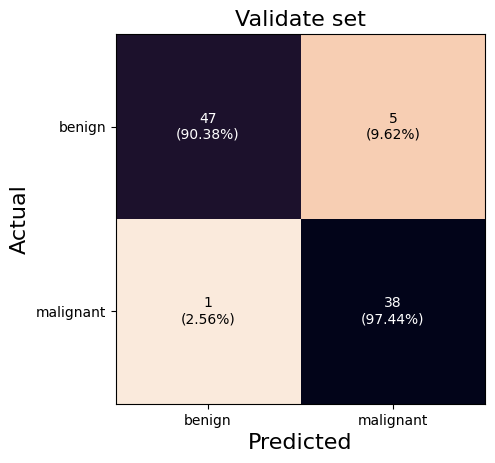

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


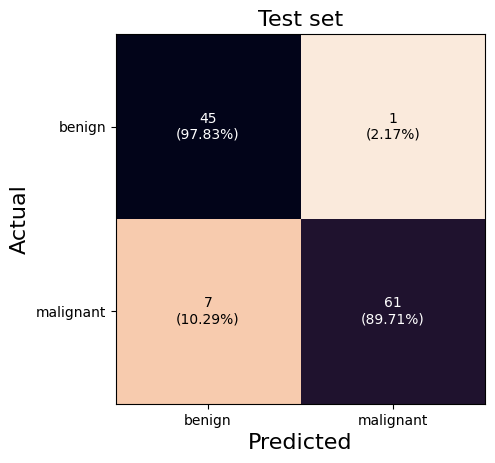

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9377


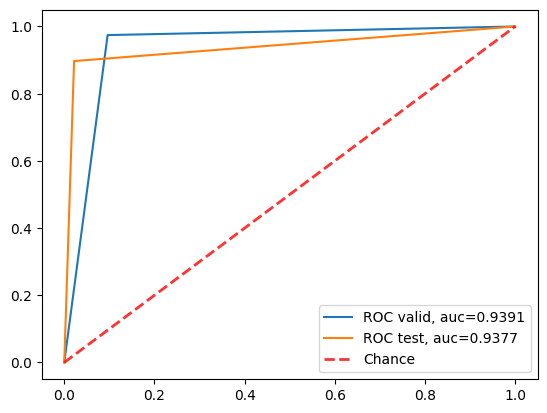

In [274]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)


# ////////////////////////////////////
# Calculate score
sen_val_split1 = sensitivity(cm_val)
spec_val_split1 = specificity(cm_val)
acc_val_split1 = accuracy(cm_val)
pre_val_split1 = precision(cm_val)
f1_score_val_split1 = f1(cm_val)
# ////////////////////////////////////


# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split1 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)


# ////////////////////////////////////
fpr_vals.append(fpr1)
tpr_vals.append(tpr1)
thresholds_vals.append(thr1)
# ////////////////////////////////////


print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[51  2]
 [ 1 37]] 

----------------
Sensitivity: 97.37%
Specificity: 96.23%
Accuracy: 96.70%
Precision: 94.87%
Sensitivity: 97.37%
Precision: 94.87%
F1: 96.10%


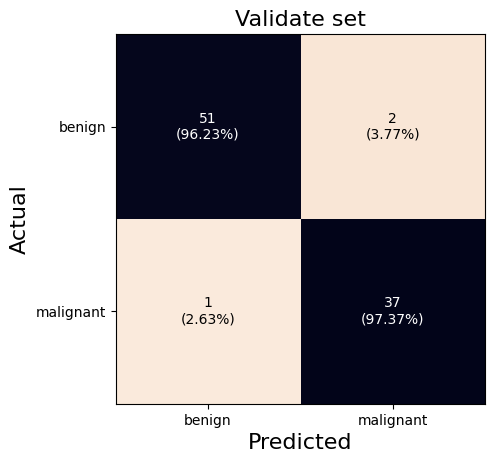

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


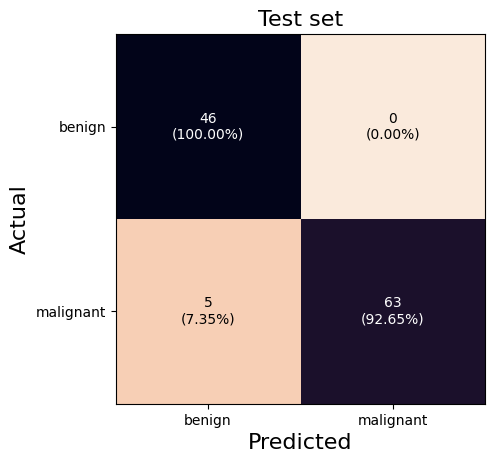

---------------------------------------
AUC validate: 0.9680
AUC test: 0.9632


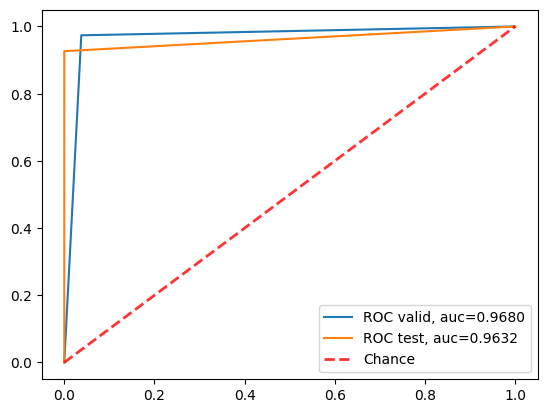

In [286]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split2 = sensitivity(cm_val)
spec_val_split2 = specificity(cm_val)
acc_val_split2 = accuracy(cm_val)
pre_val_split2 = precision(cm_val)
f1_score_val_split2 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split2 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split2)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split2))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[57  9]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 86.36%
Accuracy: 89.01%
Precision: 72.73%
Sensitivity: 96.00%
Precision: 72.73%
F1: 82.76%


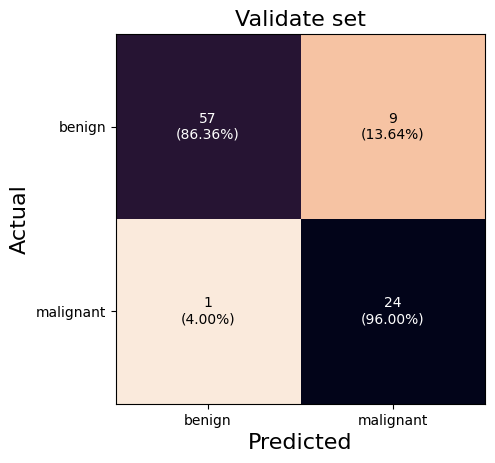

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


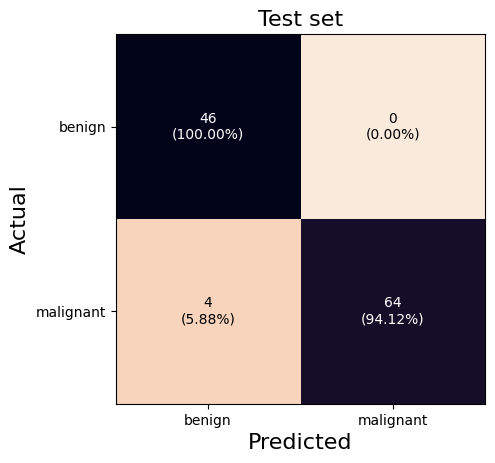

---------------------------------------
AUC validate: 0.9118
AUC test: 0.9706


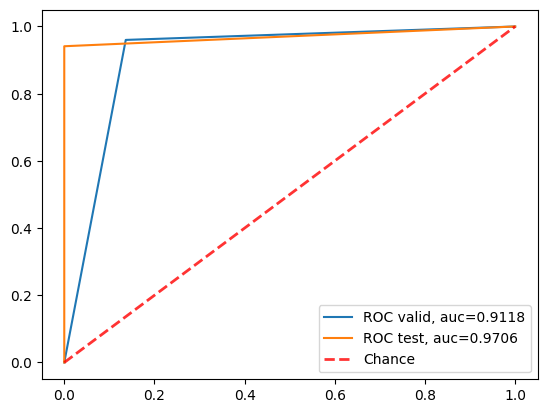

In [298]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split3 = sensitivity(cm_val)
spec_val_split3 = specificity(cm_val)
acc_val_split3 = accuracy(cm_val)
pre_val_split3 = precision(cm_val)
f1_score_val_split3 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split3 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split3)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split3))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[50 22]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 69.44%
Accuracy: 75.82%
Precision: 46.34%
Sensitivity: 100.00%
Precision: 46.34%
F1: 63.33%


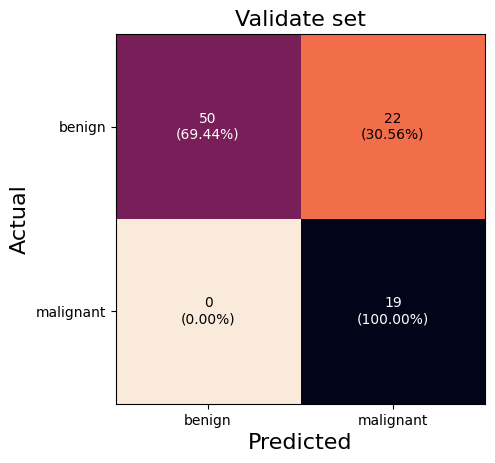

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


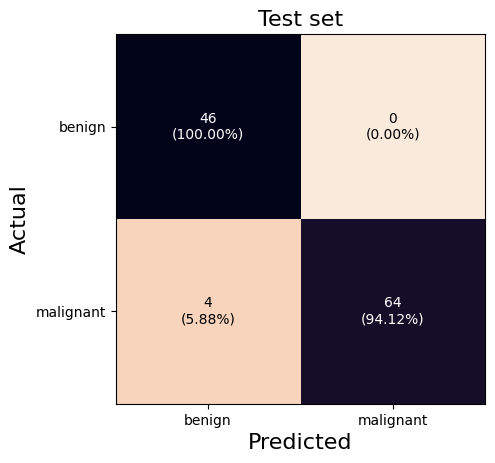

---------------------------------------
AUC validate: 0.8472
AUC test: 0.9706


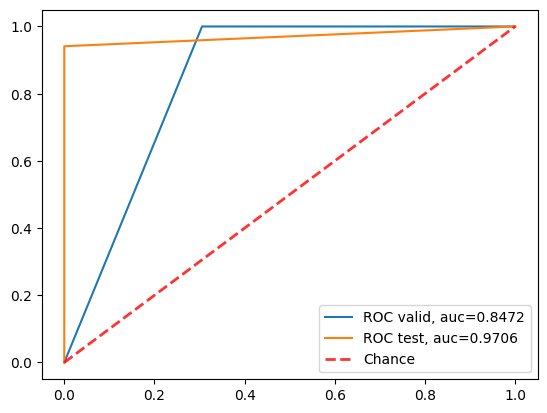

In [260]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split4 = sensitivity(cm_val)
spec_val_split4 = specificity(cm_val)
acc_val_split4 = accuracy(cm_val)
pre_val_split4 = precision(cm_val)
f1_score_val_split4 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split4 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split4)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split4))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[55 13]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 80.88%
Accuracy: 85.71%
Precision: 63.89%
Sensitivity: 100.00%
Precision: 63.89%
F1: 77.97%


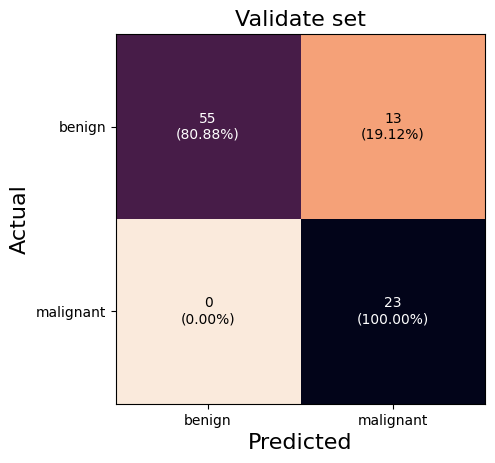

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 100.00%
Accuracy: 97.37%
Precision: 100.00%
Sensitivity: 95.59%
Precision: 100.00%
F1: 97.74%


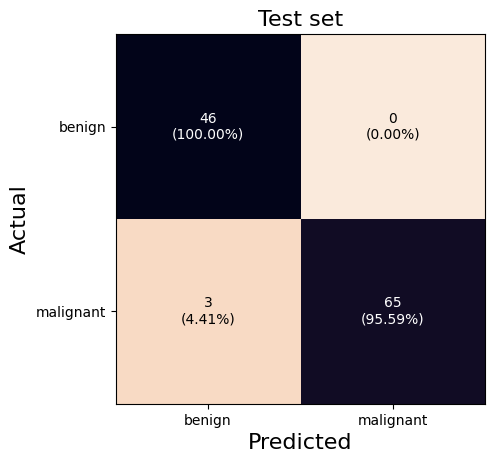

---------------------------------------
AUC validate: 0.9044
AUC test: 0.9779


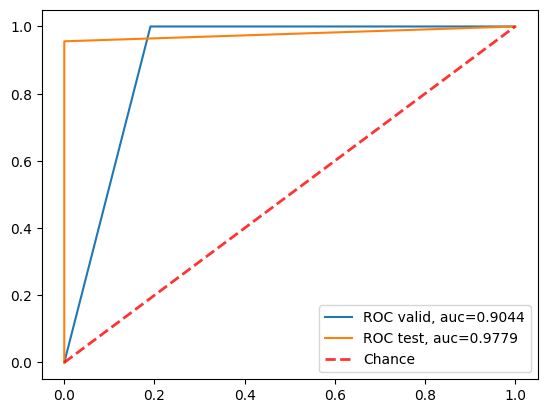

In [311]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split5 = sensitivity(cm_val)
spec_val_split5 = specificity(cm_val)
acc_val_split5 = accuracy(cm_val)
pre_val_split5 = precision(cm_val)
f1_score_val_split5 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split5 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split5)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split5))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

<mark>แก้เป็นของ val ให้หมดเลย</mark>

In [312]:
val_split1 = np.array([[47, 5], [1, 38]])
val_split2 = np.array([[51, 2], [1, 37]])
val_split3 = np.array([[57, 9], [1, 24]])
val_split4 = np.array([[50, 22], [0, 19]])
val_split5 = np.array([[55, 13], [0, 23]])

In [313]:
overall_val = val_split1 + val_split2 + val_split3 + val_split4 + val_split5
print(overall_val)

[[260  51]
 [  3 141]]


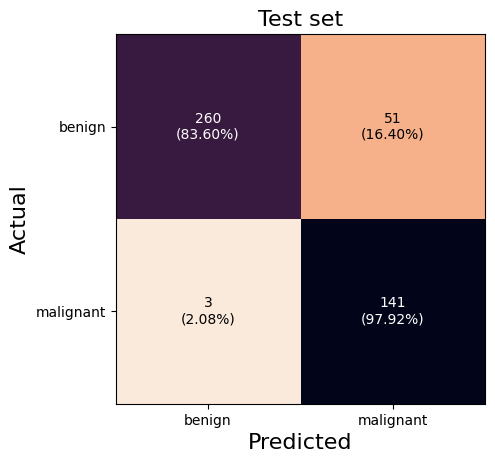

In [314]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = overall_val.astype('float') / overall_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

In [315]:
sensitivity_values = []

sensitivity_values.append(sen_val_split1)
sensitivity_values.append(sen_val_split2)
sensitivity_values.append(sen_val_split3)
sensitivity_values.append(sen_val_split4)
sensitivity_values.append(sen_val_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[97.43589743589743, 97.36842105263158, 96.0, 100.0, 100.0]
Mean Sensitivity: 98.1608636977058
Sensitivity Standard Deviation: 1.773958710299382
Overall Sensitivity: 98.16 ± 1.77%


In [316]:
specificity_values = []

specificity_values.append(spec_val_split1)
specificity_values.append(spec_val_split2)
specificity_values.append(spec_val_split3)
specificity_values.append(spec_val_split4)
specificity_values.append(spec_val_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[90.38461538461539, 96.22641509433963, 86.36363636363636, 69.44444444444444, 80.88235294117648]
Mean Specificity: 84.66029284564246
Specificity Standard Deviation: 10.1887107137298
Overall Specificity: 84.66 ± 10.19%


In [317]:
accuracy_values = []

accuracy_values.append(acc_val_split1)
accuracy_values.append(acc_val_split2)
accuracy_values.append(acc_val_split3)
accuracy_values.append(acc_val_split4)
accuracy_values.append(acc_val_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[93.4065934065934, 96.7032967032967, 89.01098901098901, 75.82417582417582, 85.71428571428571]
Mean accuracy: 88.13186813186813
accuracy Standard Deviation: 8.052778444202751
Overall accuracy: 88.13 ± 8.05%


In [318]:
precision_values = []

precision_values.append(pre_val_split1)
precision_values.append(pre_val_split2)
precision_values.append(pre_val_split3)
precision_values.append(pre_val_split4)
precision_values.append(pre_val_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[88.37209302325581, 94.87179487179486, 72.72727272727273, 46.34146341463415, 63.888888888888886]
Mean precision: 73.24030258516929
precision Standard Deviation: 19.41746782464759
Overall precision: 73.24 ± 19.42%


In [319]:
f1_values = []

f1_values.append(f1_score_val_split1)
f1_values.append(f1_score_val_split2)
f1_values.append(f1_score_val_split3)
f1_values.append(f1_score_val_split4)
f1_values.append(f1_score_val_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[92.68292682926828, 96.10389610389609, 82.75862068965516, 63.33333333333333, 77.96610169491525]
Mean f1: 82.56897573021362
f1 Standard Deviation: 13.006906140317515
Overall f1: 82.57 ± 13.01%


In [320]:
auc_values = []

auc_values.append(auc_val_split1)
auc_values.append(auc_val_split2)
auc_values.append(auc_val_split3)
auc_values.append(auc_val_split4)
auc_values.append(auc_val_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9391025641025641, 0.9679741807348561, 0.9118181818181817, 0.8472222222222222, 0.9044117647058824]
Mean auc: 0.9141057827167413
auc Standard Deviation: 0.044997947598136606
Overall auc: 0.91 ± 0.04%


## Parameter set 5

In [335]:
# Print best parameter and score
# print('Best loss parameter:', loss)
# print('Best penalty parameter:', penalty)
# print('Best learning_rate parameter:', learning_rate)
# print('Best eta0 parameter:', eta0)
# print('Best max_iter parameter:', max_iter)
# print('Best alpha parameter:', alpha)
print('Best param:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best param: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.9835261939827478


In [381]:
# create the individual models
# val
# sgd_model = SGDClassifier(loss='log_loss', penalty='l1', learning_rate='optimal', eta0=1.0, max_iter=1000, alpha=0.001)
# sgd_model.fit(x_train, y_train)

model = SVC(C=1000, gamma=0.01, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1000, gamma=0.01)

<mark>แก้ path ไว้เก็บ model อันใหม่ อันเก่า เก็บไว้ก่อนน</mark>

In [382]:
model_path = "../SGD/svm/param5/svm_model_{}.pkl".format(split)

In [383]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/param5/svm_model_split4.pkl']

In [384]:
# Load the saved model from disk
model = joblib.load(model_path)

<mark>เก็บค่า score ต่างๆ ของ val ทุก split</mark>

### split1

split1
############## validate set ################
Confusion Matrix
----------------
[[46  6]
 [ 1 38]] 

----------------
Sensitivity: 97.44%
Specificity: 88.46%
Accuracy: 92.31%
Precision: 86.36%
Sensitivity: 97.44%
Precision: 86.36%
F1: 91.57%


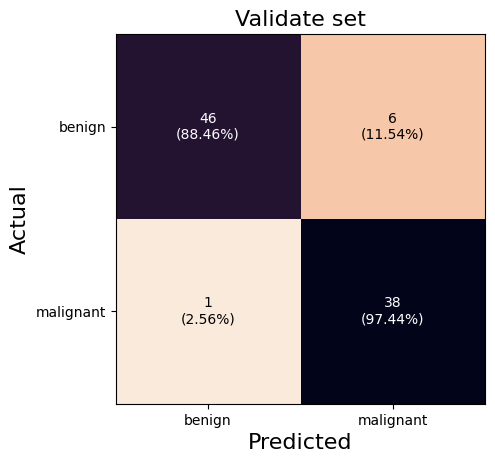

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 7 61]] 

----------------
Sensitivity: 89.71%
Specificity: 97.83%
Accuracy: 92.98%
Precision: 98.39%
Sensitivity: 89.71%
Precision: 98.39%
F1: 93.85%


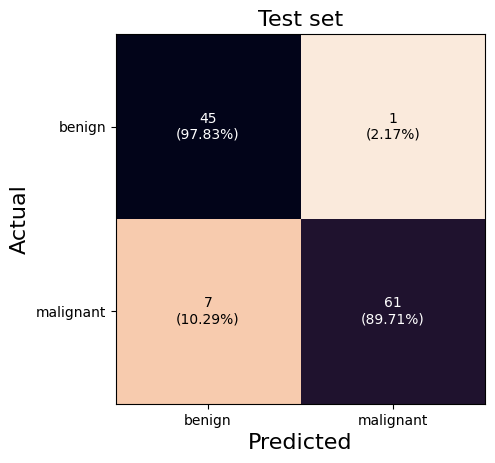

---------------------------------------
AUC validate: 0.9295
AUC test: 0.9377


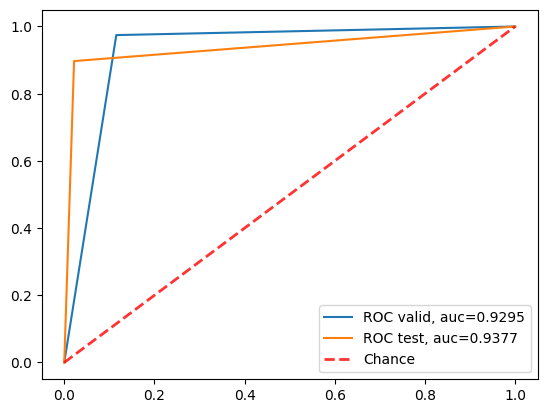

In [351]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split1 = sensitivity(cm_val)
spec_val_split1 = specificity(cm_val)
acc_val_split1 = accuracy(cm_val)
pre_val_split1 = precision(cm_val)
f1_score_val_split1 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split1 = sensitivity(cm_test)
spec_test_split1 = specificity(cm_test)
acc_test_split1 = accuracy(cm_test)
pre_test_split1 = precision(cm_test)
f1_test_split1 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split1 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test_split1)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split1))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split2

split2
############## validate set ################
Confusion Matrix
----------------
[[52  1]
 [ 2 36]] 

----------------
Sensitivity: 94.74%
Specificity: 98.11%
Accuracy: 96.70%
Precision: 97.30%
Sensitivity: 94.74%
Precision: 97.30%
F1: 96.00%


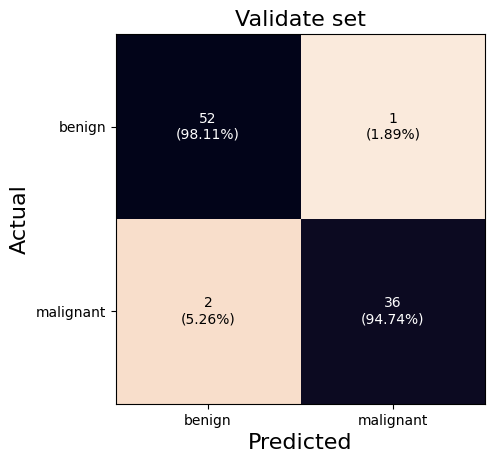

################# test set ##################
Confusion Matrix
----------------
[[44  2]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 95.65%
Accuracy: 93.86%
Precision: 96.92%
Sensitivity: 92.65%
Precision: 96.92%
F1: 94.74%


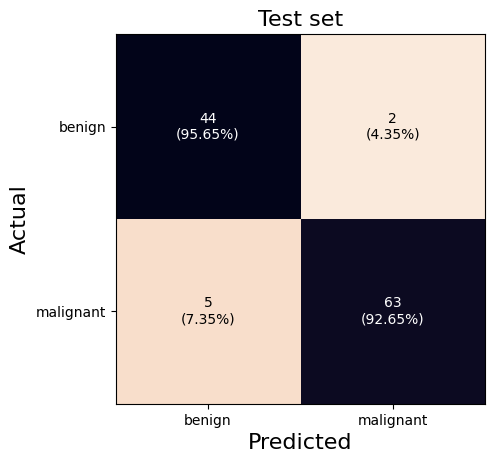

---------------------------------------
AUC validate: 0.9643
AUC test: 0.9415


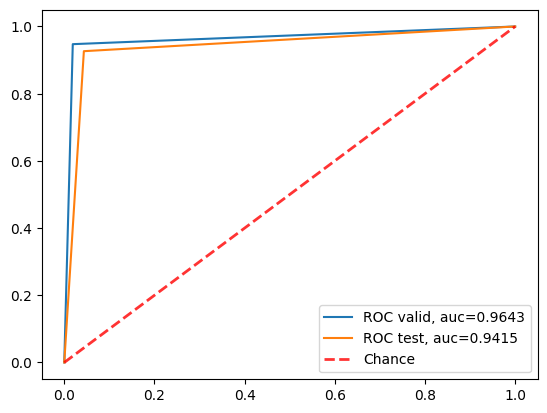

In [363]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split2 = sensitivity(cm_val)
spec_val_split2 = specificity(cm_val)
acc_val_split2 = accuracy(cm_val)
pre_val_split2 = precision(cm_val)
f1_score_val_split2 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()


################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split2 = sensitivity(cm_test)
spec_test_split2 = specificity(cm_test)
acc_test_split2 = accuracy(cm_test)
pre_test_split2 = precision(cm_test)
f1_test_split2 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split2 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split2)
print("AUC test: %.4f" % auc_test_split2)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split2))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split3

split3
############## validate set ################
Confusion Matrix
----------------
[[55 11]
 [ 1 24]] 

----------------
Sensitivity: 96.00%
Specificity: 83.33%
Accuracy: 86.81%
Precision: 68.57%
Sensitivity: 96.00%
Precision: 68.57%
F1: 80.00%


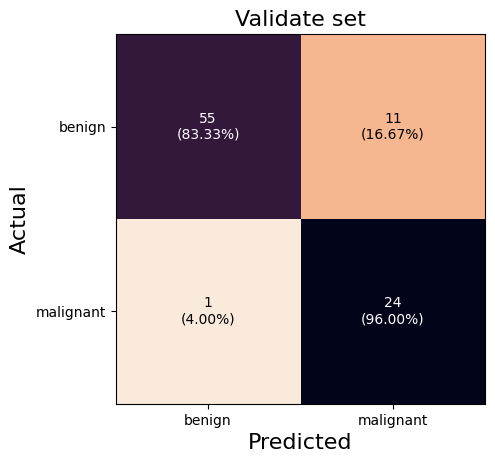

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 4 64]] 

----------------
Sensitivity: 94.12%
Specificity: 100.00%
Accuracy: 96.49%
Precision: 100.00%
Sensitivity: 94.12%
Precision: 100.00%
F1: 96.97%


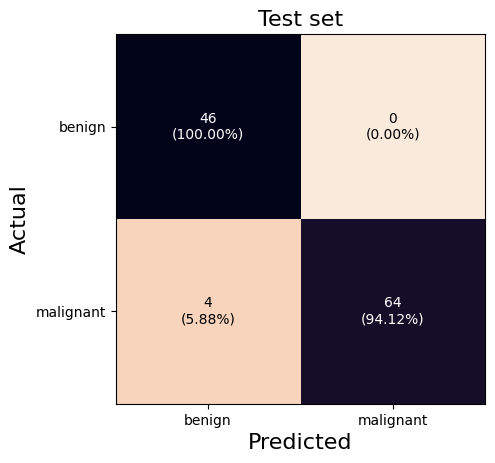

---------------------------------------
AUC validate: 0.8967
AUC test: 0.9706


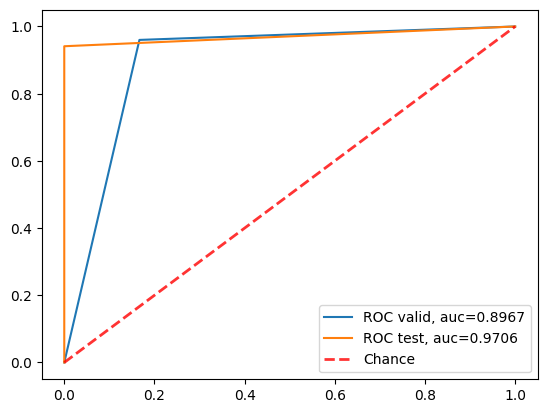

In [374]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split3 = sensitivity(cm_val)
spec_val_split3 = specificity(cm_val)
acc_val_split3 = accuracy(cm_val)
pre_val_split3 = precision(cm_val)
f1_score_val_split3 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split3 = sensitivity(cm_test)
spec_test_split3 = specificity(cm_test)
acc_test_split3 = accuracy(cm_test)
pre_test_split3 = precision(cm_test)
f1_test_split3 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split3 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split3)
print("AUC test: %.4f" % auc_test_split3)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split3))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split4

split4
############## validate set ################
Confusion Matrix
----------------
[[52 20]
 [ 0 19]] 

----------------
Sensitivity: 100.00%
Specificity: 72.22%
Accuracy: 78.02%
Precision: 48.72%
Sensitivity: 100.00%
Precision: 48.72%
F1: 65.52%


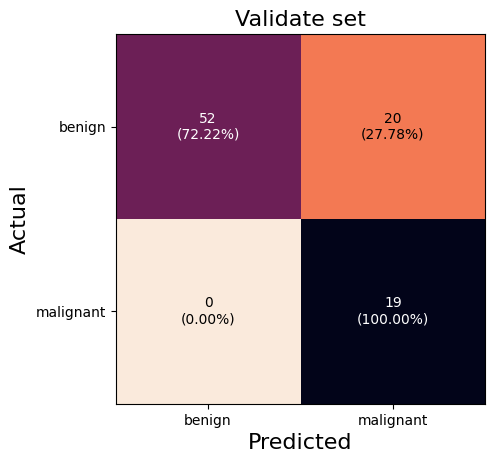

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 6 62]] 

----------------
Sensitivity: 91.18%
Specificity: 97.83%
Accuracy: 93.86%
Precision: 98.41%
Sensitivity: 91.18%
Precision: 98.41%
F1: 94.66%


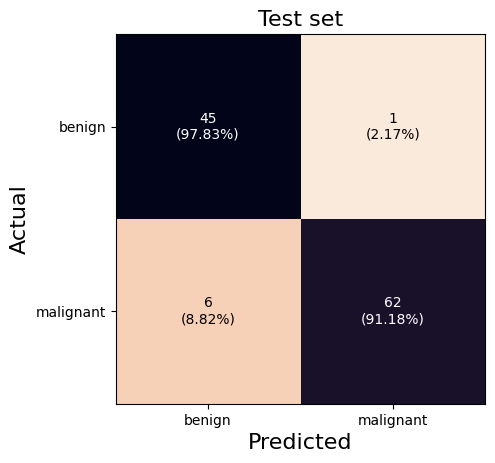

---------------------------------------
AUC validate: 0.8611
AUC test: 0.9450


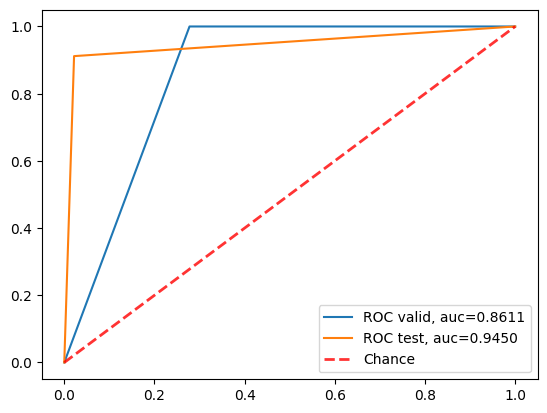

In [385]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split4 = sensitivity(cm_val)
spec_val_split4 = specificity(cm_val)
acc_val_split4 = accuracy(cm_val)
pre_val_split4 = precision(cm_val)
f1_score_val_split4 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split4 = sensitivity(cm_test)
spec_test_split4 = specificity(cm_test)
acc_test_split4 = accuracy(cm_test)
pre_test_split4 = precision(cm_test)
f1_test_split4 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split4 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split4)
print("AUC test: %.4f" % auc_test_split4)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split4))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### split5

split5
############## validate set ################
Confusion Matrix
----------------
[[46 22]
 [ 0 23]] 

----------------
Sensitivity: 100.00%
Specificity: 67.65%
Accuracy: 75.82%
Precision: 51.11%
Sensitivity: 100.00%
Precision: 51.11%
F1: 67.65%


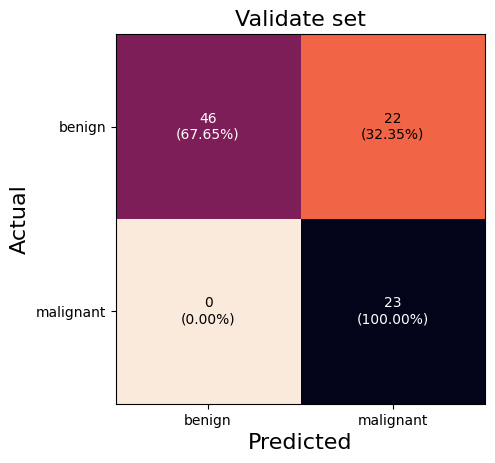

################# test set ##################
Confusion Matrix
----------------
[[45  1]
 [ 3 65]] 

----------------
Sensitivity: 95.59%
Specificity: 97.83%
Accuracy: 96.49%
Precision: 98.48%
Sensitivity: 95.59%
Precision: 98.48%
F1: 97.01%


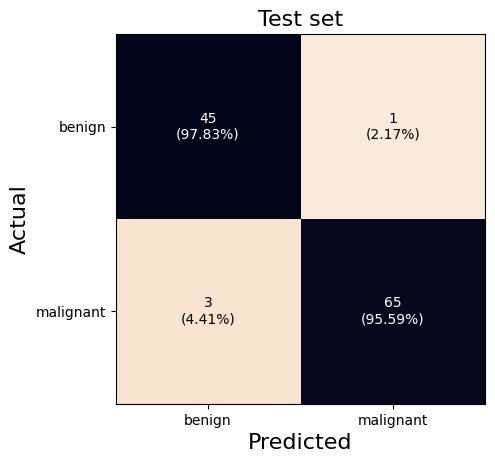

---------------------------------------
AUC validate: 0.8382
AUC test: 0.9671


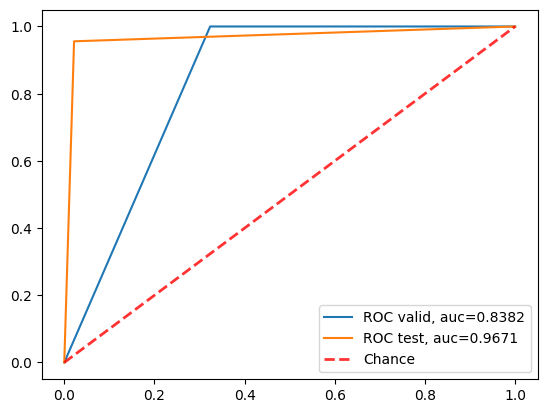

In [340]:
print(split)
############## validate set ################
print("############## validate set ################")
y_pred_val = model.predict(x_val)

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

# ////////////////////////////////////
# Calculate score
sen_val_split5 = sensitivity(cm_val)
spec_val_split5 = specificity(cm_val)
acc_val_split5 = accuracy(cm_val)
pre_val_split5 = precision(cm_val)
f1_score_val_split5 = f1(cm_val)
# ////////////////////////////////////

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)
# Print the predictions
# print(y_pred)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test_split5 = sensitivity(cm_test)
spec_test_split5 = specificity(cm_test)
acc_test_split5 = accuracy(cm_test)
pre_test_split5 = precision(cm_test)
f1_test_split5 = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val_split5 = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val_split5)
print("AUC test: %.4f" % auc_test_split5)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val_split5))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################

### overall

<mark>แก้เป็นของ val ให้หมดเลย</mark>

In [386]:
val_split1 = np.array([[46, 6], [1, 38]])
val_split2 = np.array([[52, 1], [2, 36]])
val_split3 = np.array([[55, 11], [1, 24]])
val_split4 = np.array([[52, 20], [0, 19]])
val_split5 = np.array([[46, 22], [0, 23]])

In [387]:
overall_val = val_split1 + val_split2 + val_split3 + val_split4 + val_split5
print(overall_val)

[[251  60]
 [  4 140]]


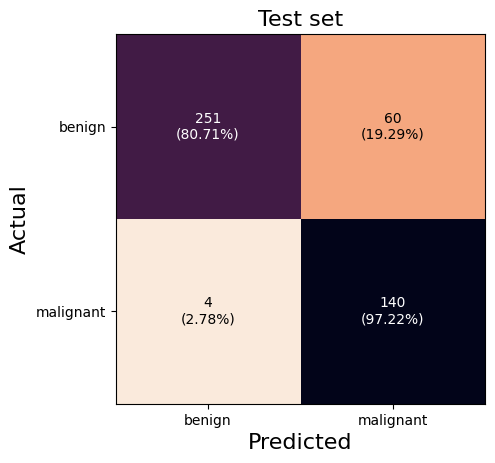

In [388]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = overall_val.astype('float') / overall_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(overall_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

In [389]:
sensitivity_values = []

sensitivity_values.append(sen_val_split1)
sensitivity_values.append(sen_val_split2)
sensitivity_values.append(sen_val_split3)
sensitivity_values.append(sen_val_split4)
sensitivity_values.append(sen_val_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Overall Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))

[97.43589743589743, 94.73684210526315, 96.0, 100.0, 100.0]
Mean Sensitivity: 97.63454790823212
Sensitivity Standard Deviation: 2.3610715253843386
Overall Sensitivity: 97.63 ± 2.36%


In [390]:
specificity_values = []

specificity_values.append(spec_val_split1)
specificity_values.append(spec_val_split2)
specificity_values.append(spec_val_split3)
specificity_values.append(spec_val_split4)
specificity_values.append(spec_val_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[88.46153846153845, 98.11320754716981, 83.33333333333334, 72.22222222222221, 67.64705882352942]
Mean Specificity: 81.95547207755865
Specificity Standard Deviation: 12.296001987773645
Overall Specificity: 81.96 ± 12.30%


In [391]:
accuracy_values = []

accuracy_values.append(acc_val_split1)
accuracy_values.append(acc_val_split2)
accuracy_values.append(acc_val_split3)
accuracy_values.append(acc_val_split4)
accuracy_values.append(acc_val_split5)
    
print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[92.3076923076923, 96.7032967032967, 86.81318681318682, 78.02197802197803, 75.82417582417582]
Mean accuracy: 85.93406593406594
accuracy Standard Deviation: 8.974732742459521
Overall accuracy: 85.93 ± 8.97%


In [392]:
precision_values = []

precision_values.append(pre_val_split1)
precision_values.append(pre_val_split2)
precision_values.append(pre_val_split3)
precision_values.append(pre_val_split4)
precision_values.append(pre_val_split5)
    
print(precision_values)

# calculating the mean of sample set
mean_precision = statistics.mean(precision_values)
# Calculate standard deviation of sensitivity
precision_sd = statistics.stdev(precision_values)

print("Mean precision:", mean_precision)
print("precision Standard Deviation:", precision_sd)

# Print mean specificity with standard deviation
print("Overall precision: %.2f ± %.2f%%" % (mean_precision, precision_sd))

[86.36363636363636, 97.2972972972973, 68.57142857142857, 48.717948717948715, 51.11111111111111]
Mean precision: 70.41228441228441
precision Standard Deviation: 21.353089876821546
Overall precision: 70.41 ± 21.35%


In [393]:
f1_values = []

f1_values.append(f1_score_val_split1)
f1_values.append(f1_score_val_split2)
f1_values.append(f1_score_val_split3)
f1_values.append(f1_score_val_split4)
f1_values.append(f1_score_val_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[91.56626506024098, 95.99999999999999, 80.00000000000001, 65.51724137931033, 67.6470588235294]
Mean f1: 80.14611305261614
f1 Standard Deviation: 13.71146596190147
Overall f1: 80.15 ± 13.71%


In [394]:
auc_values = []

auc_values.append(auc_val_split1)
auc_values.append(auc_val_split2)
auc_values.append(auc_val_split3)
auc_values.append(auc_val_split4)
auc_values.append(auc_val_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9294871794871794, 0.9642502482621648, 0.8966666666666666, 0.8611111111111112, 0.8382352941176471]
Mean auc: 0.8979500999289538
auc Standard Deviation: 0.05078118103000751
Overall auc: 0.90 ± 0.05%


# Best parameter

<h3><i>ข้างบนมีไฮไลท์ตรงที่แก้ให้นะ</i></h3>

In [191]:
# เลือกจาก acc สูงสุดของ validation

In [198]:
train_path = "../Anny_oversampling/DATA/train.csv"

In [199]:
# Load the train set
train_data = pd.read_csv(train_path)
print(train_data.shape)
x_train = train_data[train_data.columns[2:]]
print(x_train.shape)
y_train = train_data[train_data.columns[1]]
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

(455, 32)
(455, 30)
['B' 'M']


In [194]:
# Load the test set
test_data = pd.read_csv(test_path)
print(test_data.shape)
x_test = test_data[test_data.columns[3:]]
print(x_test.shape)
y_test = test_data[test_data.columns[2]]
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

(114, 33)
(114, 30)
['B' 'M']


In [195]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [196]:
# Best parameter based on validation data
# Parameter set 4
model = SVC(C=0.026000000000000002, gamma='scale', kernel='linear', class_weight=None)
# model = SVC(C=1, gamma=0.1, kernel='rbf')
model.fit(x_train, y_train)

SVC(C=0.026000000000000002, kernel='linear')

In [186]:
model_path = "../SGD/svm/svm_model.pkl"

In [187]:
# Save the trained model to disk
joblib.dump(model, model_path)

['../SGD/svm/svm_model.pkl']

In [188]:
# Load the saved model from disk
model = joblib.load(model_path)

################# test set ##################
Confusion Matrix
----------------
[[46  0]
 [ 5 63]] 

----------------
Sensitivity: 92.65%
Specificity: 100.00%
Accuracy: 95.61%
Precision: 100.00%
Sensitivity: 92.65%
Precision: 100.00%
F1: 96.18%


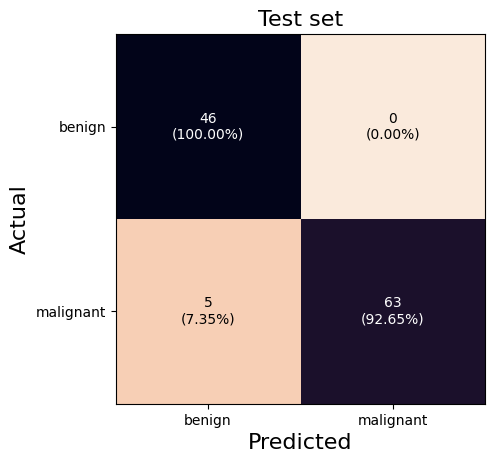

---------------------------------------
AUC test: 0.9632


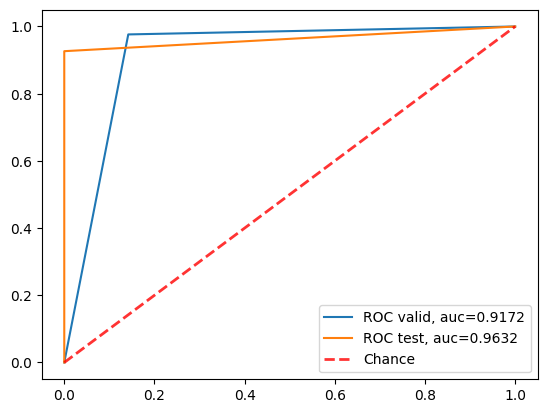

In [197]:

################# test set ##################
print("################# test set ##################")
y_pred_test = model.predict(x_test)

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test,'\n')
print('-'*16)

# Calculate score
sen_test = sensitivity(cm_test)
spec_test = specificity(cm_test)
acc_test = accuracy(cm_test)
pre_test = precision(cm_test)
f1_test = f1(cm_test)

# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

################## plot ROC curve ########################

mean_fpr_val = np.mean(fpr_vals, axis=0)
mean_tpr_val = np.mean(tpr_vals, axis=0)
mean_thresholds_val = np.mean(thresholds_vals, axis=0)
auc_val = auc(mean_fpr_val, mean_tpr_val)

# fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
# auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
# print("AUC validate: %.4f" % auc_val_split1)
print("AUC test: %.4f" % auc_test)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(mean_fpr_val, mean_tpr_val,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()
##########################################################